## Experimenting with $P_{hm}$ for BAO:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Load data

def get_powers(low_k_cut=0.01, high_k_cut=1, fid='HF'):
    if fid == 'HF':
        pk_files = ['/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/all_powerspectra_12.3.txt',
                    '/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/all_powerspectra.txt']
    elif fid == 'L2':
        pk_files = ['/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2/all_powerspectra_L2_12.3.txt',
                    '/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2/all_powerspectra.txt']    
    mass_thresholds = [12.3, 11.5]
    powers = {}
    for i in range(len(pk_files)):
        a = np.loadtxt(pk_files[i], skiprows=1)
        # Remove rows where the first column is less than or equal to 0.01
        ind = np.where((a[:, 0] > low_k_cut) & (a[:, 0] < high_k_cut))[0]
        a = a[ind, :]
        powers[mass_thresholds[i]] = {}
        powers[mass_thresholds[i]]['k'] = a[:, 0]
        powers[mass_thresholds[i]]['plin'] = a[:, 1]
        powers[mass_thresholds[i]]['phlin'] = a[:, 2]
    return powers

from scipy.optimize import curve_fit
def model(k, g0, g2, g4, sigma_d):
    return (g0 + g2 * k**2 + g4 * k**4) * np.exp(-1 * sigma_d**2 * k**2 / 2)

def fit_gk(k, plin, phm):
    """
    Fit the equation below to P_hm / P_lin
    G(k) = (g_0 + g_2 k^2 + g_4 k^4) exp(- sigma_d^2_lin k^2 / 2 )
    where sigma_d = 1/2*pi^2 \int P_lin(k) dk
    Parameters:
    k : array_like
    Plin : array_like
    Phm : array_like
    Returns:
    g0, g2, g4, sigma : float
    """
    #sigma_d = 1/(2*np.pi**2) * np.trapz(plin, k)
    popt, _ = curve_fit(model, k, phm/plin)
    return popt[0], popt[1], popt[2], popt[3]       
    
def plot_power_spectra(fig=None, ax=None, fid='HF'):
    power = get_powers(fid=fid)

    # Plotting
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 3, figsize=(16, 5))
    for i, mth in enumerate(power.keys()):
        g0, g2, g4, sigma_d = fit_gk(power[mth]['k'], power[mth]['plin'], power[mth]['phlin'])
        fit_model = model(power[mth]['k'], g0, g2, g4, sigma_d)
        if i == 0:
            ax[0].plot(power[mth]['k'], power[mth]['plin'], label=fr'$P_{{lin}}$')
        ax[0].plot(power[mth]['k'], power[mth]['phlin'], label=fr'$P_{{lin}},\, M>{mth}$')
        ax[1].plot(power[mth]['k'], power[mth]['phlin'] / power[mth]['plin'], label=fr'$P_{{hlin}}/P_{{lin}},\, M>{mth}$')
        ax[1].plot(power[mth]['k'], fit_model, label=fr'$G(k),\, M>{mth}$', ls='--')
        # Third plot: ratio and fit model
        if len(ax) < 3:
            # Add a third axis if not present
            fig.subplots_adjust(right=0.75)
            ax.append(fig.add_axes([0.75, 0.15, 0.22, 0.7]))
       ax[1].plot(power[mth]['k'], (power[mth]['phlin'] / power[mth]['plin'])/fit_model, label=fr'$P_{{hlin}}/P_{{lin}} / G(k),\, M>{mth}$')
   ax[1].set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
    ax[2].set_ylabel('G(k) / fit')
    ax[2].grid(which='both', linestyle='--', alpha=0.5)
    ax[2].legend()

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
    ax[0].set_ylabel('$P(k)$')
    ax[0].legend()
    ax[1].set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
    ax[1].legend()


## For HF:

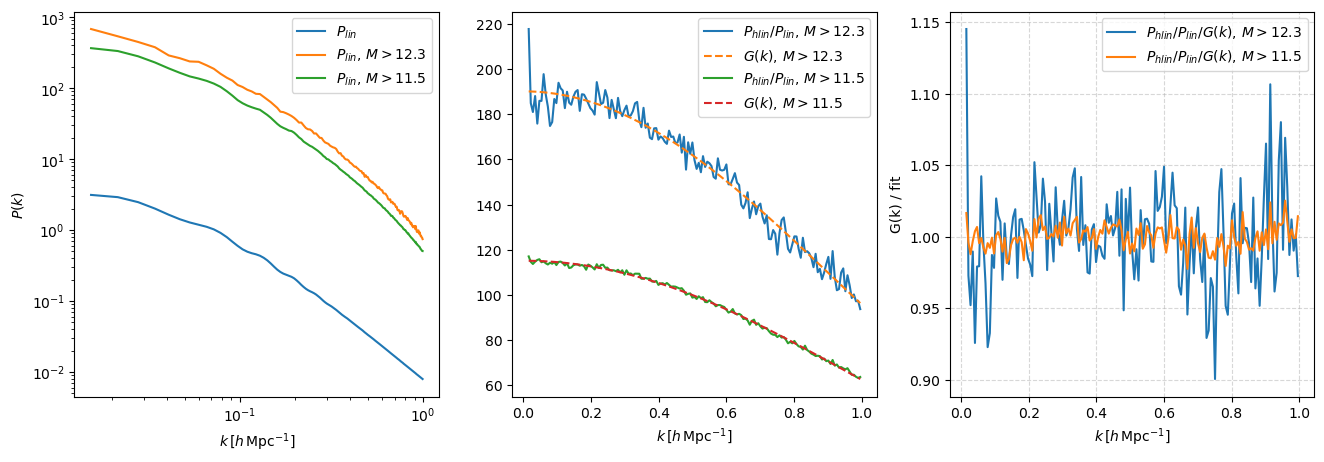

In [5]:
plot_power_spectra(fid='HF')

## For L2:

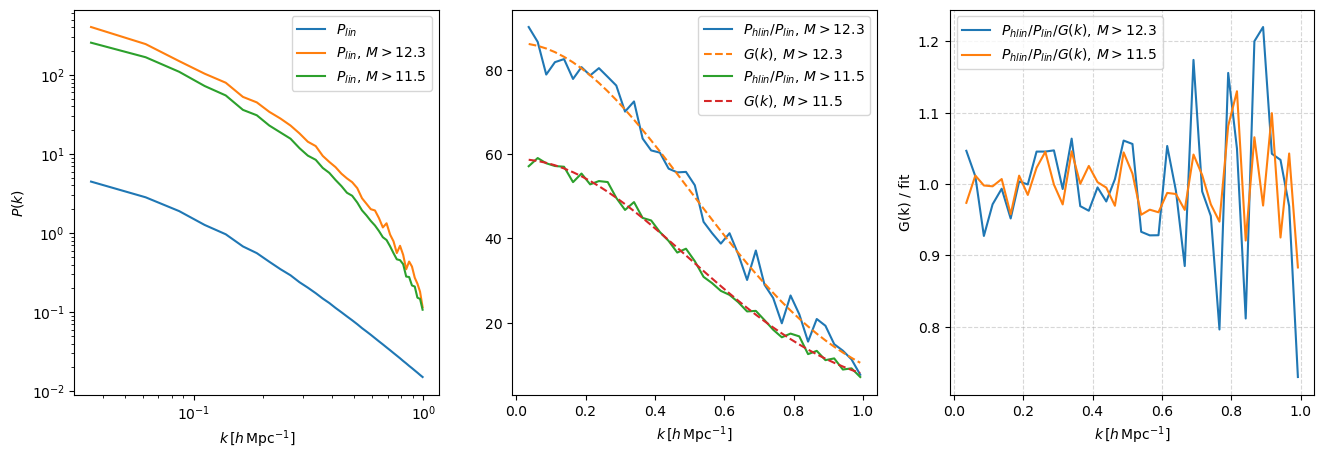

In [2]:
plot_power_spectra(fid='L2')

Simpel check for the full list of the powers:

<KeysViewHDF5 ['k_hlin', 'k_init', 'mbins', 'power_hlin', 'power_init', 'sim_tag']>
(21, 500)


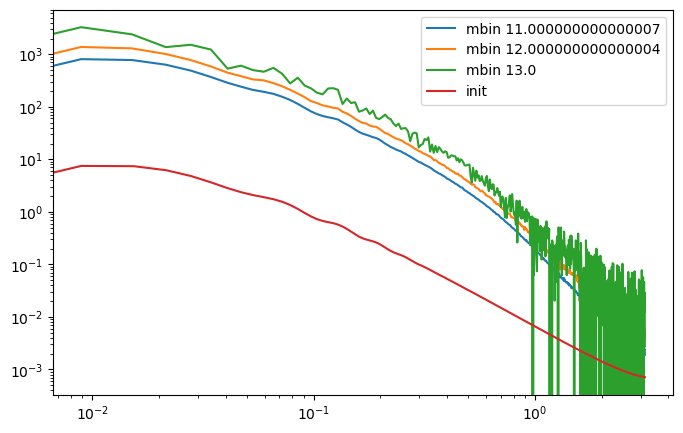

In [25]:
import h5py, numpy as np
import matplotlib.pyplot as plt
basedir = '/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/'
savefile = basedir + 'power_compressed_10p_Box1000_Part3000_0024.hdf5'

with h5py.File(savefile, 'r') as f:
    print(f.keys())
    print(f['power_hlin'].shape)
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(f['k_hlin'][:], f['power_hlin'][20,:], label=f'mbin {f["mbins"][20]}')
    ax.plot(f['k_hlin'][:], f['power_hlin'][10,:], label=f'mbin {f["mbins"][10]}')
    ax.plot(f['k_hlin'][:], f['power_hlin'][0,:], label=f'mbin {f["mbins"][0]}')
    ax.plot(f['k_init'][:], f['power_init'][:], label='init')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()

<KeysViewHDF5 ['k_hlin', 'k_init', 'mbins', 'power_hlin', 'power_init', 'sim_tag']>
(21, 125)


/tmp/ipykernel_651509/3234696740.py:11: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]


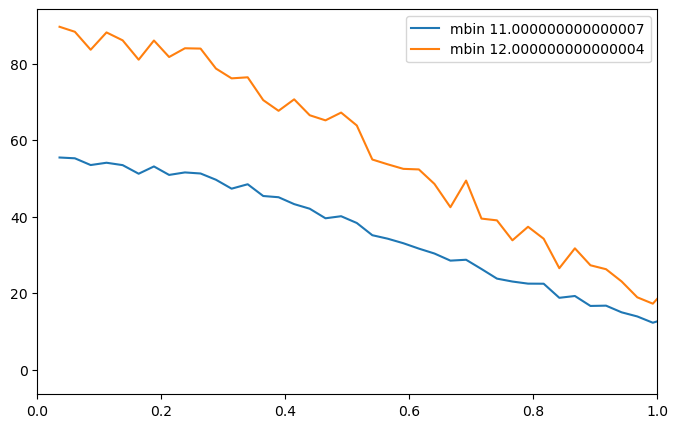

In [6]:
import h5py, numpy as np
import matplotlib.pyplot as plt
basedir = '/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2/'
savefile = basedir + 'power_compressed_10p_Box250_Part750_0003.hdf5'
#basedir = '/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/'
#savefile = basedir + 'power_compressed_10p_Box1000_Part3000_0024.hdf5'
with h5py.File(savefile, 'r') as f:
    print(f.keys())
    print(f['power_hlin'].shape)
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ratio = f['power_hlin'][:,:] / f['power_init'][:]
    ax.plot(f['k_hlin'][:], ratio[20] , label=f'mbin {f["mbins"][20]}')
    ax.plot(f['k_hlin'][:], ratio[10], label=f'mbin {f["mbins"][10]}')
    #ax.plot(f['k_hlin'][:], ratio[0], label=f'mbin {f["mbins"][0]}')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_xlim(0,1)
    ax.legend()

In [6]:
import numpy as np
from glob import glob
import h5py
basedir = f'/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/*'
fnames = glob(basedir + 'power*.hdf5')
print(f'Found {len(fnames)} files in {basedir}')
for fn in fnames[0:2]:
    with h5py.File(fn, 'r') as f:
        print(f.keys())

Found 21 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/*
<KeysViewHDF5 ['k_hlin', 'k_init', 'mbins', 'power_hlin', 'power_init', 'sim_tag']>
<KeysViewHDF5 ['k_hlin', 'k_init', 'mbins', 'power_hlin', 'power_init', 'sim_tag']>


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import h5py
from scipy.optimize import curve_fit


# Load data

def get_powers(fid='HF', max_k=1):
    
    basedir = f'/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/{fid}/'
    fnames = glob(basedir + 'power*.hdf5')
    print(f'Found {len(fnames)} files in {basedir}')
    all_ratios = []
    sim_tags = []
    fluctuating_sims = []
    for fn in fnames:
        with h5py.File(fn, 'r') as f:
            ratio = f['power_hlin'][:,:] / f['power_init'][:]
            k = f['k_hlin'][:]
            mbins = f['mbins'][:]
            # The first k bin is nan, so we remove it
            k = k [1:]
            ratio = ratio[:, 1:]
            # place a cap on k
            ind = np.where(k <= max_k)
            k = k[ind]
            ratio = ratio[:, ind]
            # Finding the sims with too much fluctuation
            if np.any(ratio < 0.1):
                fluctuating_sims.append(f['sim_tag'])
                print(f'Simulation {f["sim_tag"][()]} has too much fluctuation')
            sim_tags.append(f['sim_tag'])
            all_ratios.append(ratio.squeeze())
    all_ratios = np.array(all_ratios)
    return all_ratios, k, mbins

def model(k, g0, g2, g4, sigma_d):
    return (g0 + g2 * k**2 + g4 * k**4) * np.exp(-1 * sigma_d**2 * k**2 / 2)

def fit_gk(k, ratio):
    """
    Fit the equation below to P_hm / P_lin
    G(k) = (g_0 + g_2 k^2 + g_4 k^4) exp(- sigma_d^2_lin k^2 / 2 )
    where sigma_d = 1/2*pi^2 \int P_lin(k) dk
    Parameters:
    k : array_like
    Plin : array_like
    Phm : array_like
    Returns:
    g0, g2, g4, sigma : float
    """
    #sigma_d = 1/(2*np.pi**2) * np.trapz(plin, k)
    popt, _ = curve_fit(model, k,ratio)
    return popt[0], popt[1], popt[2], popt[3]     

In [4]:
def plot_power_spectra(fid='HF', mths= [12.3, 11.8, 11.0]):
    ratios, k, mbins = get_powers(fid=fid)
    print(f'ratios.shape = {ratios.shape}, k.shape = {k.shape}, mbins.shape = {mbins.shape}')
    fig, ax= plt.subplots(3, len(mths), figsize=(16, 10))
    ind_mass = [np.where(np.isclose(mbins, mth, atol=1e-3))[0][0] for mth in mths]
    print(f'ind_mass = {ind_mass}')
    for m, ind_m in enumerate(ind_mass):
        for s in range(len(ratios)):
            g0, g2, g4, sigma_d = fit_gk(k, ratios[s,ind_m])
            fit_model = model(k, g0, g2, g4, sigma_d)
            ax[0, m].plot(k, ratios[s,ind_m,:])
            ax[1, m].plot(k, fit_model, ls='--')
            ax[2, m].plot(k, ratios[s,ind_m,:] / fit_model, alpha=0.5)
        
        #ax[m].set_ylim()
        #ax[0, m].set_yscale('log')
        #ax[1, m].set_yscale('log')
        ax[0,m].set_ylim(0, 400)
        ax[1,m].set_ylim(0, 400)
        ax[2,m].set_ylim(0.8, 1.2)
        ax[2, m].axhline(1, color='k', ls='--')
        ax[0,m].set_title(f'M > {mths[m]}')
        ax[2, m].grid(which='both', linestyle='--', alpha=0.8)
        ax[2, m].set_xlabel('$ratio = k \, [h \, \mathrm{Mpc}^{-1}]$')
        ax[0, m].set_ylabel('$P_{hm}/P_{lin}$')
        ax[1, m].set_ylabel('Fit $G(k)$')
        ax[2, m].set_ylabel('Ratio / Fit')
    fig.suptitle(f'{fid}')

    fig.tight_layout()       

Found 21 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/
Simulation b'compressed_10p_Box1000_Part3000_0024' has too much fluctuation
Simulation b'compressed_10p_Box1000_Part3000_0522' has too much fluctuation
Simulation b'compressed_10p_Box1000_Part3000_0072' has too much fluctuation
ratios.shape = (21, 21, 158), k.shape = (158,), mbins.shape = (21,)
ind_mass = [np.int64(7), np.int64(12), np.int64(20)]


/tmp/ipykernel_255529/4177372980.py:20: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]
/tmp/ipykernel_255529/4177372980.py:55: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(model, k,ratio)


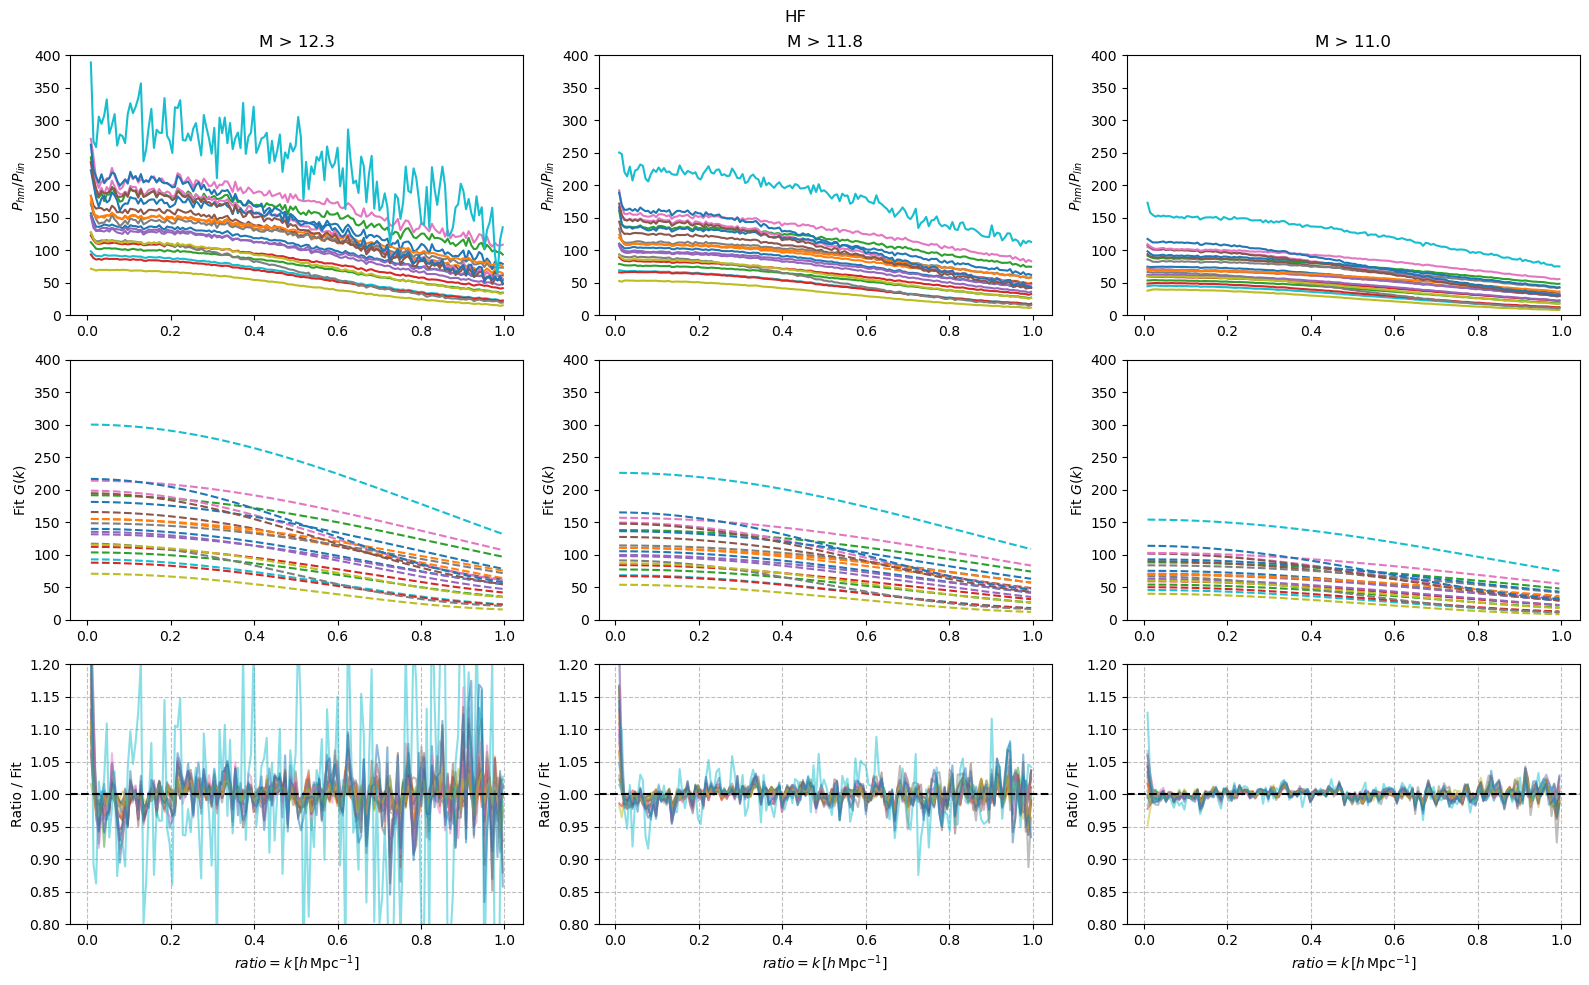

In [5]:
plot_power_spectra()

Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2/
Simulation b'compressed_10p_Box250_Part750_0295' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0051' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0060' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0255' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0093' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0270' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0081' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0055' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0070' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0268' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0021' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0015' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_

/tmp/ipykernel_255529/4177372980.py:20: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]


Simulation b'compressed_10p_Box250_Part750_0298' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0072' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0045' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0066' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0291' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0048' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0052' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0013' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0076' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0300' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0000' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0054' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0260' has too much fluctuation
Simulation b'compressed_10p_Box250_Par

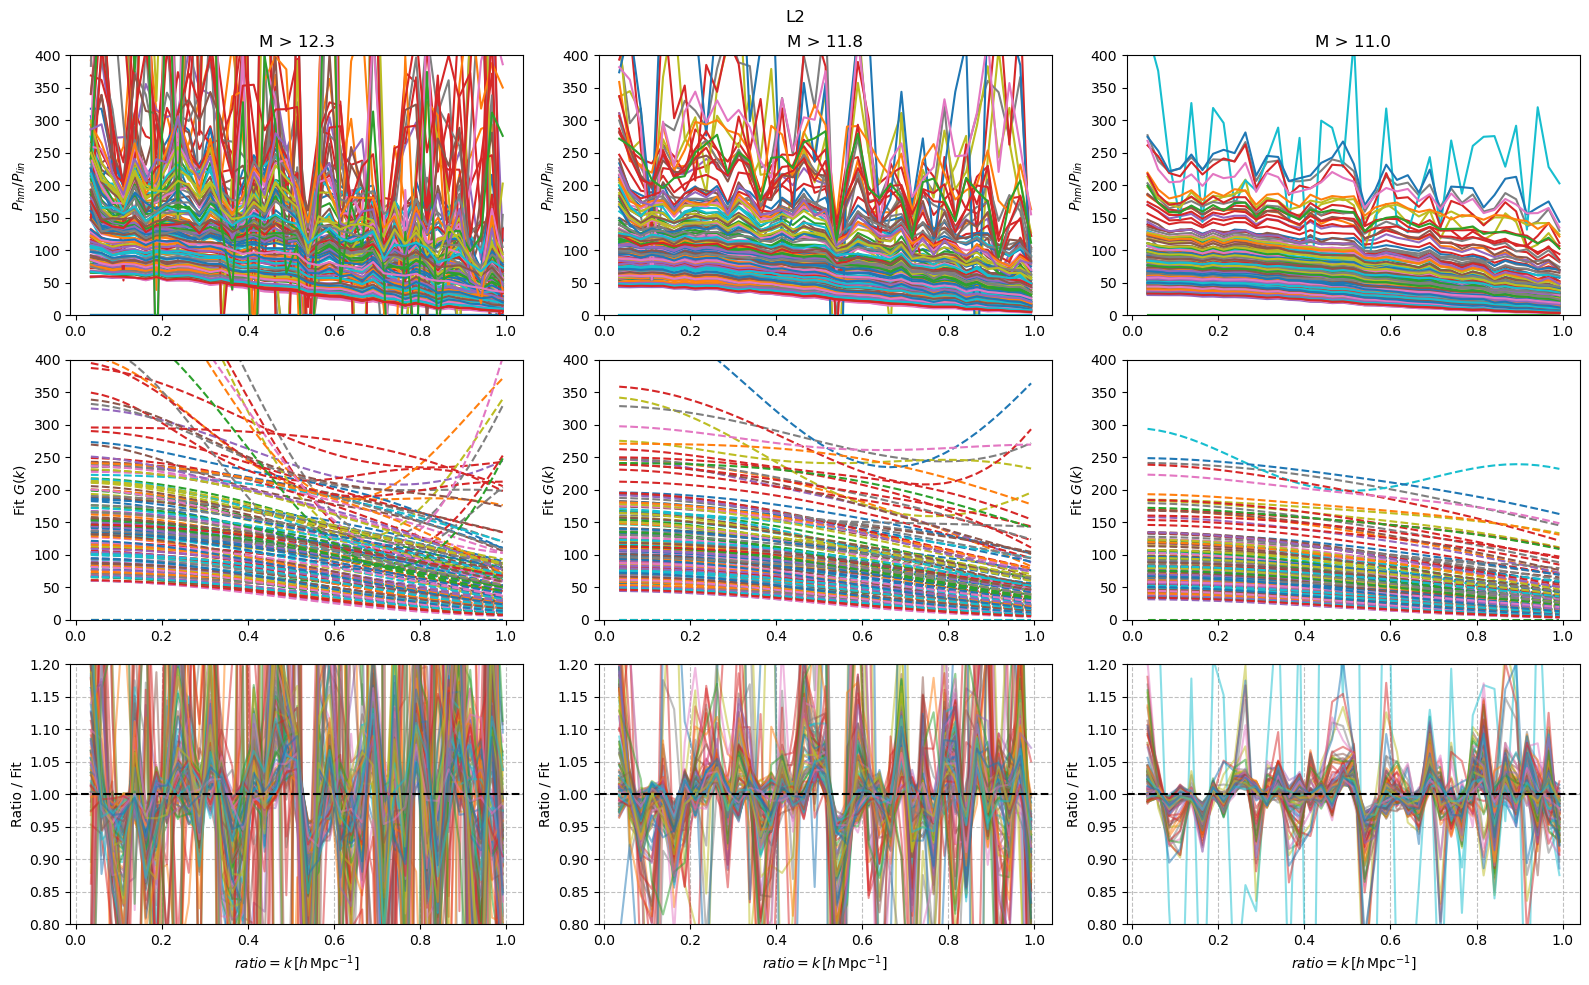

In [6]:
plot_power_spectra(fid='L2')

### Expolre $\sigma_{d,lim}$:

Fro mour fit:

In [4]:
def explore_sigma_d(fid='HF', mths= [11.8]):
    ratios, k, mbins = get_powers(fid=fid)
    print(f'ratios.shape = {ratios.shape}, k.shape = {k.shape}, mbins.shape = {mbins.shape}')
    ind_mass = [np.where(np.isclose(mbins, mth, atol=1e-3))[0][0] for mth in mths]
    print(f'ind_mass = {ind_mass}')
    for m, ind_m in enumerate(ind_mass):
        for s in range(len(ratios)):
            g0, g2, g4, sigma_d = fit_gk(k, ratios[s,ind_m])
            print(f'sigma_d = {sigma_d}')
explore_sigma_d()

Found 21 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/
Simulation b'compressed_10p_Box1000_Part3000_0024' has too much fluctuation
Simulation b'compressed_10p_Box1000_Part3000_0522' has too much fluctuation
Simulation b'compressed_10p_Box1000_Part3000_0072' has too much fluctuation
ratios.shape = (21, 21, 158), k.shape = (158,), mbins.shape = (21,)
ind_mass = [12]
sigma_d = -1.5355633960703534
sigma_d = 1.4670018099879094
sigma_d = -1.3607540108437517
sigma_d = -1.470101669456992
sigma_d = -1.370400430661531
sigma_d = 0.00031185526887781215
sigma_d = 0.47604677373955134
sigma_d = 1.4195983134423271
sigma_d = -0.7485038908314223
sigma_d = -0.7012188168619996
sigma_d = -0.0008895201369929313
sigma_d = 1.3887644731173732
sigma_d = 1.5415864374421844
sigma_d = -0.44100191930134197
sigma_d = -1.5455673065913798
sigma_d = 1.005944351676058
sigma_d = 1.2796485927712518
sigma_d = 1.2049668833049814
sigma_d = 0.35182662740569975
sigma_d = -1.3360069687222422
sigma_d = 0.80813170104

/tmp/ipykernel_333557/4177372980.py:20: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]


In [1]:
import importlib
from gal_goku import summary_stats
importlib.reload(summary_stats)

data_dir='/home/qezlou/HD2/HETDEX/cosmo/data'
prop = summary_stats.Propagator(data_dir=data_dir, z=2.5, fid='HF')
#prop.gk.shape

2025-07-01 17:26:35.486203: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 17:26:35.489448: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 17:26:35.499051: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751408795.514579  709365 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751408795.519244  709365 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751408795.532234  709365 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

summary_stats | 07/01/2025 05:26:38 PM | Rank 0 | INFO  |  Found 21 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF
Simulation b'compressed_10p_Box1000_Part3000_0522' has too much fluctuation


/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:254: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]


ind_mass = [7, 12, 20]


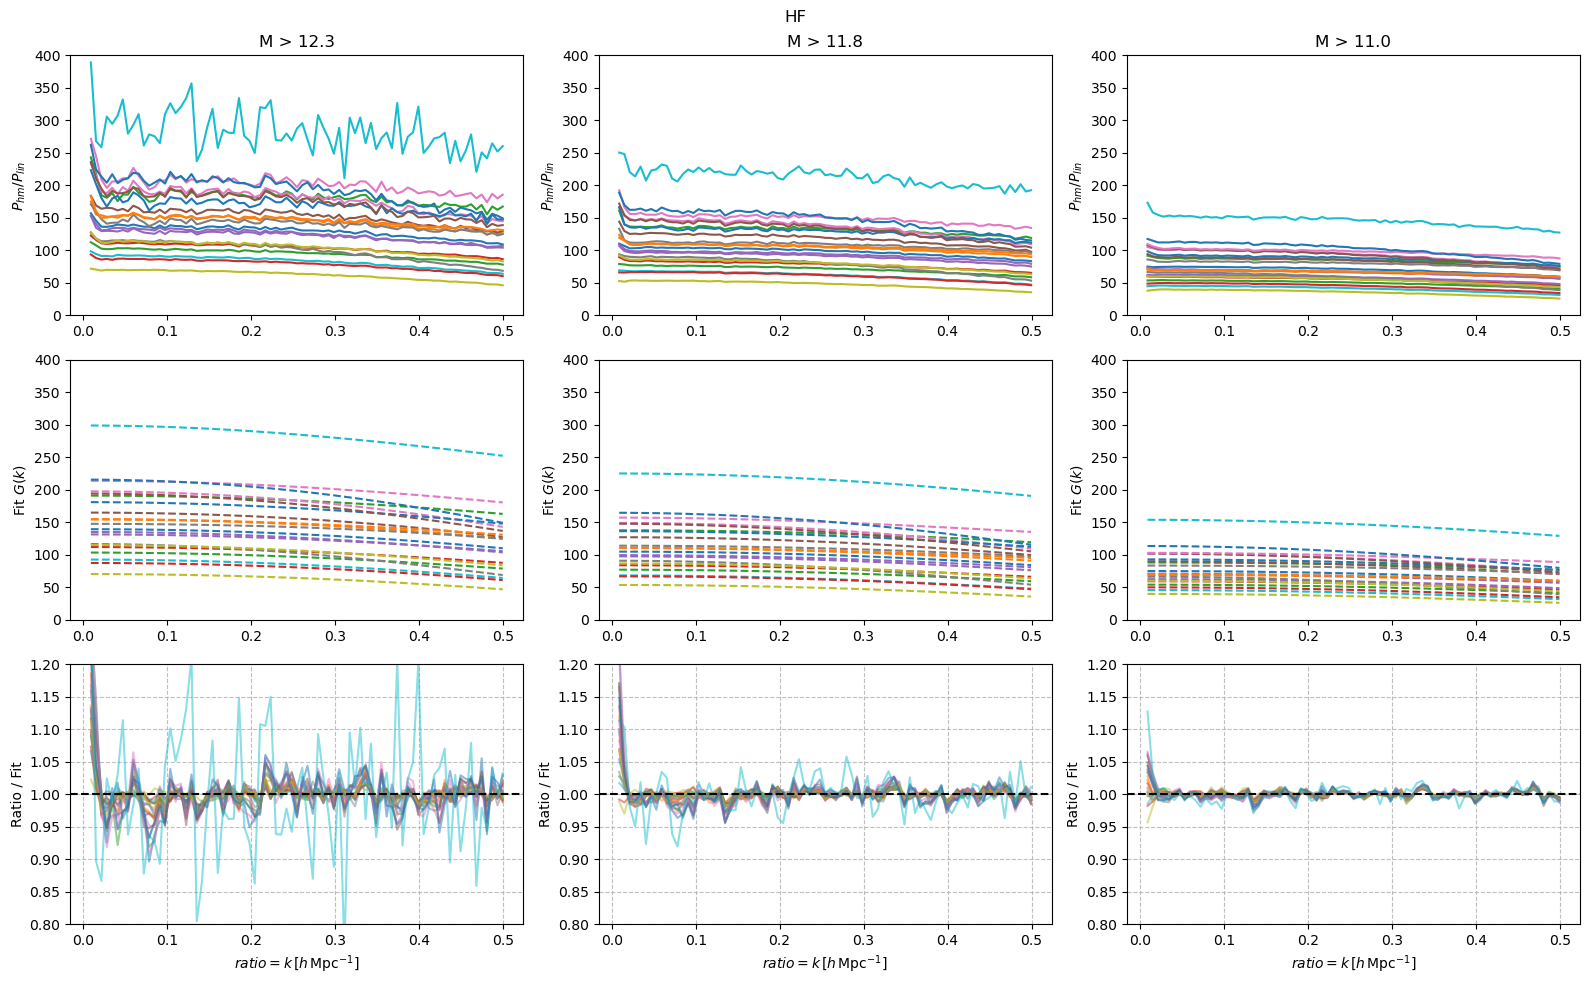

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_power_spectra(prop, mths= [12.3, 11.8, 11.0]):

    fig, ax= plt.subplots(3, len(mths), figsize=(16, 10))
    ind_mass = [np.where(np.isclose(prop.mbins, mth, atol=1e-3))[0][0] for mth in mths]
    print(f'ind_mass = {ind_mass}')
    for m, ind_m in enumerate(ind_mass):
        for s in range(prop.gk.shape[0]):
            ax[0, m].plot(prop.k, prop.gk[s,ind_m,:])
            ax[1, m].plot(prop.k, prop.fit_gk[s, ind_m, :], ls='--')
            ax[2, m].plot(prop.k, prop.gk[s,ind_m,:] / prop.fit_gk[s, ind_m,:], alpha=0.5)
        
        #ax[m].set_ylim()
        #ax[0, m].set_yscale('log')
        #ax[1, m].set_yscale('log')
        ax[0,m].set_ylim(0, 400)
        ax[1,m].set_ylim(0, 400)
        ax[2,m].set_ylim(0.8, 1.2)
        ax[2, m].axhline(1, color='k', ls='--')
        ax[0,m].set_title(f'M > {mths[m]}')
        ax[2, m].grid(which='both', linestyle='--', alpha=0.8)
        ax[2, m].set_xlabel('$ratio = k \, [h \, \mathrm{Mpc}^{-1}]$')
        ax[0, m].set_ylabel('$P_{hm}/P_{lin}$')
        ax[1, m].set_ylabel('Fit $G(k)$')
        ax[2, m].set_ylabel('Ratio / Fit')
    fig.suptitle(f'{prop.fid}')

    fig.tight_layout()   

plot_power_spectra(prop)

In [7]:
import importlib
from gal_goku import summary_stats
importlib.reload(summary_stats)

data_dir='/home/qezlou/HD2/HETDEX/cosmo/data'
prop = summary_stats.Propagator(data_dir=data_dir, z=2.5, fid='L2')
#prop.gk.shape

summary_stats | 07/02/2025 03:13:22 PM | Rank 0 | INFO  |  Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2
summary_stats | 07/02/2025 03:13:22 PM | Rank 0 | INFO  |  Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2
summary_stats | 07/02/2025 03:13:22 PM | Rank 0 | INFO  |  Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2
summary_stats | 07/02/2025 03:13:22 PM | Rank 0 | INFO  |  Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2
summary_stats | 07/02/2025 03:13:22 PM | Rank 0 | INFO  |  Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2
summary_stats | 07/02/2025 03:13:22 PM | Rank 0 | INFO  |  Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2
summary_stats | 07/02/2025 03:13:22 PM | Rank 0 | INFO  |  Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2
Simulation b'compressed_10p_Box250_Part750_0295' has too much fluctuation
Simulation b'compressed_10p_Box250_Pa

/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:324: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(func, self.k, self.gk[i,m])


In [8]:
prop.sim_tags[0]

'compressed_10p_Box250_Part750_0295'

ind_mass = [7, 12, 20]


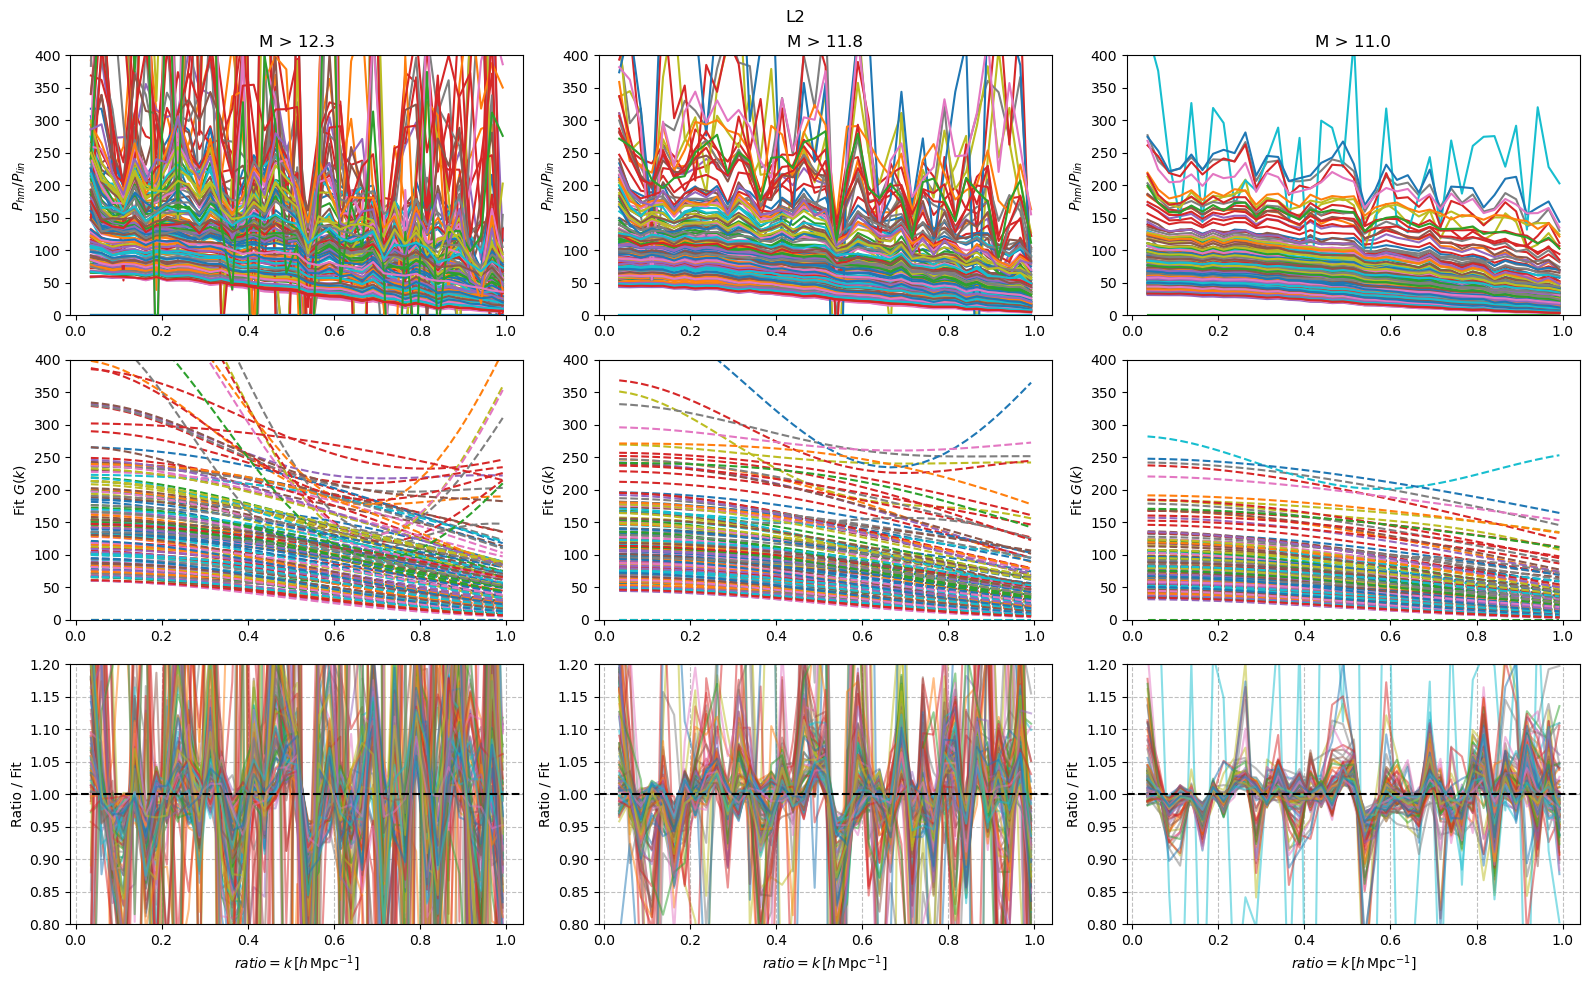

In [9]:
plot_power_spectra(prop)

## Recovering $P_{hh}$ from $G(k)$:


In [1]:
import importlib
from gal_goku import predict_propagator
importlib.reload(predict_propagator)

data_dir='/home/qezlou/HD2/HETDEX/cosmo/data'
predictor = predict_propagator.Predictor(data_dir=data_dir, fid='HF', z=2.5)

2025-07-07 14:59:32.887259: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 14:59:32.890156: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 14:59:32.899494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751918372.914981  985783 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751918372.919781  985783 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751918372.931878  985783 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

summary_stats | 07/07/2025 02:59:36 PM | Rank 0 | INFO  |  Found 21 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF
Simulation b'compressed_10p_Box1000_Part3000_0522' has too much fluctuation


/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:402: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]


summary_stats | 07/07/2025 02:59:53 PM | Rank 0 | INFO  |  Found 21 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_bins/HF
summary_stats | 07/07/2025 02:59:53 PM | Rank 0 | INFO  |  Found 21 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_bins/HF


In [2]:
results = predictor.predict_phh(sim=9)


sim_tag = compressed_10p_Box1000_Part3000_0207
mass bins [11.3 11.3] and (11.300000000000006, 11.300000000000006)
__init__: initializing parameters... 2025-07-07 14:59:53.117380
__init__: done. 2025-07-07 14:59:53.117405 

cambfile: loading defaults... 2025-07-07 14:59:53.117420
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-07 15:01:01.869105 

k shape: (600,), p_hh_model shape: (1, 600), p_hh_sim shape: (1, 600)


/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/init_power.py:271: UserWarning: Class did not read input parameter(s): tol_perturb_integration
  engine  = CLASS.ClassEngine(pre_params)


In [5]:
import matplotlib.pyplot as plt
def plot_results(sim):
    results = predictor.predict_phh(sim=sim)
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(results['k'], results['p_hh_sim'].squeeze(), label='Simulation')
    ax[0].plot(results['k'], results['p_hh_model'].squeeze(), label=r'$G(k)^2 P_{mm}$', ls='--')
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_ylabel('$P_{hh}(k)$')
    ax[0].set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
    ax[0].legend()

    ax[1].plot(results['r_hh_sim'].squeeze(), results['xi_hh_sim'].squeeze(), label='Simulation')
    ax[1].plot(results['r_hh_model'].squeeze(), results['xi_hh_model'].squeeze(), label=r'$iFT[G(k)^2 P_{mm}]$', ls='--')
    ax[1].set_xlim(60, 140)
    ax[1].set_ylim(1e-4, 1e-1)


sim_tag = compressed_10p_Box1000_Part3000_0207
mass bins [11.3 11.3] and (11.300000000000006, 11.300000000000006)
__init__: initializing parameters... 2025-07-07 15:31:17.530374
__init__: done. 2025-07-07 15:31:17.530397 

cambfile: loading defaults... 2025-07-07 15:31:17.530410
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-07 15:32:25.616709 

k shape: (600,), p_hh_model shape: (1, 600), p_hh_sim shape: (1, 600)
sim_tag = compressed_10p_Box1000_Part3000_0241
mass bins [11.3 11.3] and (11.300000000000006, 11.300000000000006)
__init__: initializing parameters... 2025-07-07 15:32:25.635028
__init__: done. 2025-07-07 15:32:25.635054 

cambfile: loading defaults... 2025-07-07 15:32:25.635068
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-07 15:33:25

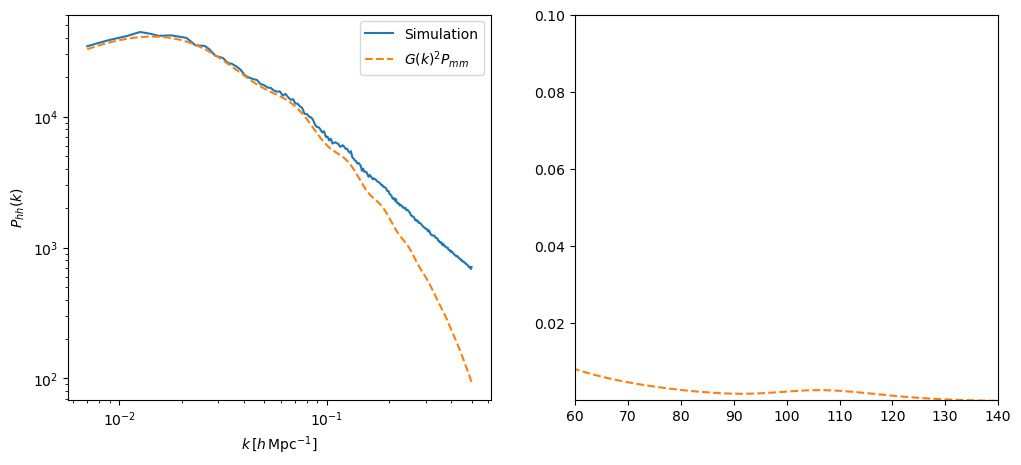

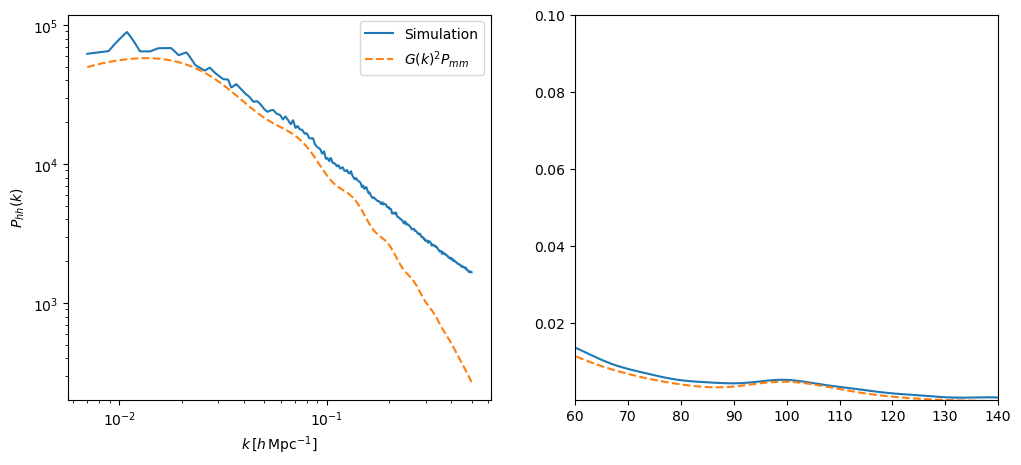

In [6]:
plot_results(sim=9)
plot_results(sim=13)

In [1]:
import importlib
from gal_goku import summary_stats
importlib.reload(summary_stats)

data_dir='/home/qezlou/HD2/HETDEX/cosmo/data'
prop = summary_stats.Propagator(data_dir=data_dir, z=2.5, fid='HF')

2025-07-07 12:56:29.036659: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 12:56:29.039550: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 12:56:29.048632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751910989.063597  948824 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751910989.068095  948824 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751910989.079929  948824 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

summary_stats | 07/07/2025 12:56:31 PM | Rank 0 | INFO  |  Found 21 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF
Simulation b'compressed_10p_Box1000_Part3000_0522' has too much fluctuation


/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:392: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]


In [ ]:
import importlib
import matplotlib.pyplot as plt
from gal_goku import gal
importlib.reload(gal)
from scipy.interpolate import interp1d
import mcfit
import numpy as np
import h5py

def get_init_power(sim, k_log):
    gal_base = gal.GalBase()
    cosmo_pars = prop.params[sim]
    k_lin_init, p_lin_init = gal_base.get_init_linear_power(cosmo_pars=cosmo_pars)
    k_init = k_lin_init
    p_lin_init = p_lin_init

    # Resample p_hlin_model to logarithmic k within the same range as k_init
    interp_p_hlin_model = interp1d(k_init, np.copy(p_lin_init), axis=-1, bounds_error=False, fill_value="extrapolate")
    p_lin_init = interp_p_hlin_model(k_log)
    return k_log, p_lin_init

def plot_model(prop, fid='HF', sim_list=[10, 15]):
    
    k_init = np.logspace(np.log10(7e-3), np.log10(0.5), num=600)
    # Evaluate G(k) at k_init
    gk = prop.get_model_gk(k_init)

    data_dir='/home/qezlou/HD2/HETDEX/cosmo/data'
    halo_pow = summary_stats.HaloHaloPower(data_dir, fid=fid, z=2.5)
    for sim in sim_list:
        _ , p_init = get_init_power(sim, k_log=k_init)
        print(prop.sim_tags[sim])
        p_hlin = prop.get_powers()[-3][sim]
        # Resample p_hlin to logarithmic k within the same range as prop.k
        k_log_prop = np.logspace(np.log10(prop.k.min()), np.log10(prop.k.max()), num=500)
        interp_p_hlin = interp1d(prop.k, np.copy(p_hlin[17, :]), axis=-1, bounds_error=False, fill_value="extrapolate")
        p_hlin_log = interp_p_hlin(k_log_prop)
        r_hlin, xi_hlin = mcfit.P2xi(k_log_prop, l=0, lowring=True)(np.copy(p_hlin_log), extrap=True)

        p_hlin_model = gk[sim] * p_init
        p_hh_model = gk[sim]**2 * p_init
        r_hlin_model, xi_hlin_model = mcfit.P2xi(k_init, l=0, lowring=True)(np.copy(p_hlin_model), extrap=True)
        r_hh_model, xi_hh_model = mcfit.P2xi(k_init, l=0, lowring=True)(np.copy(p_hh_model), extrap=True)


        fig, ax = plt.subplots(1, 4, figsize=(22, 6))
        ax[0].plot(k_init, p_hlin_model[17,:], label=f'P_hlin_model, mass= {prop.mbins[17]:.2f}')
        ax[0].plot(k_init, p_hlin_model[10,:], label=f'P_hlin_model, mass= {prop.mbins[10]:.2f}')
        ax[0].plot(k_init, p_hh_model[17,:], label=f'P_hh_model, mass= {prop.mbins[17]:.2f}', ls=':', lw=4)
        ax[0].plot(prop.k, p_hlin[17,:], label=f'P_hlin, mass= {prop.mbins[17]:.2f}', ls='--')
        ax[0].plot(prop.k, p_hlin[10,:], label=f'P_hlin, mass= {prop.mbins[10]:.2f}', ls='--')
       
        ax[0].plot(k_init, p_init, label='P_init')

        p_hh_sim = halo_pow.pk[sim,:,:]
        p_hh_sim = interp1d(k_hh_sim, p_hh_sim, axis=-1, bounds_error=False, fill_value="extrapolate")(k_init)
        ind_m = np.where(np.isclose(halo_pow.mpairs[:,0], 11.3, atol=1e-3) & np.isclose(halo_pow.mpairs[:,1], 11.3, atol=1e-3))[0]
        ax[0].plot(k_init, p_hh_sim[ind_m,:].squeeze(), label=f'P_hh sim (mass = {halo_pow.mpairs[ind_m,0][0]:.2f})')

        r_hh_sim, xi_hh_sim = mcfit.P2xi(k_init, l=0, lowring=True)(np.copy(p_hh_sim[ind_m,:].squeeze()), extrap=True)
        ind_r = np.where((r_hh_sim >= 60) & (r_hh_sim <= 200))[0]
        ax[2].plot(r_hh_sim[ind_r], xi_hh_sim[ind_r], label=f'xi_hh_sim, mass= {halo_pow.mpairs[ind_m,0][0]:.2f}', ls='--')


        ax[0].set_xscale('log')
        ax[0].set_yscale('log')
        ax[0].legend()
        ax[0].set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
        ax[0].set_ylabel('$P(k)$')
        ax[0].set_xlim(7e-3, 0.5)

        ind = np.where((r_hlin >= 60) & (r_hlin <= 200))[0]
        ax[1].plot(r_hlin[ind], xi_hlin[ind], label=f'xi_hlin, mass= {prop.mbins[20]:.2f}')
        ind = np.where((r_hlin_model >= 60) & (r_hlin_model <= 200))[0]
        ax[1].plot(r_hlin_model[ind], xi_hlin_model[17, ind], label=f'xi_hlin_model, mass= {prop.mbins[17]:.2f}', ls='--')
        ax[2].plot(r_hh_model[ind], xi_hh_model[17, ind], label=f'xi_hh_model, mass= {prop.mbins[17]:.2f}', ls=':', lw=4)
        ax[2].plot(r_hh_model[ind], xi_hh_model[10, ind], label=f'xi_hh_model, mass= {prop.mbins[10]:.2f}', ls=':', lw=4)
        #ax[1].set_xlim(60, 200)
        ax[1].set_xlabel('$r \, [h^{-1} \, \mathrm{Mpc}]$')
        ax[1].set_ylabel('$\\xi(r)$')
        ax[1].legend()
        ax[2].legend()
        fig.tight_layout()

        # Plot the ratio of xi_hh_model to xi_hh_sim
        ax[3].plot(r_hh_model[ind], xi_hh_model[17, ind] / xi_hh_sim[ind], label=f' {prop.mbins[17]:.2f}', ls='--')
        ax[3].set_ylabel('xi_hh_model / xi_hh_sim')

        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(prop.k, prop.gk[sim, 20,:], label=f'G(k), mass= {prop.mbins[20]:.2f}')
        ax.plot(k_init, gk[sim][20,:], label=f'fit G(k), mass= {prop.mbins[10]:.2f}')
        ax.legend()
        ax.set_ylabel('G(k)')
        ax.set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
        ax.set_xlim(7e-3, 0.5)  

__init__: initializing parameters... 2025-07-07 13:20:05.313027
__init__: done. 2025-07-07 13:20:05.313122 

cambfile: loading defaults... 2025-07-07 13:20:05.313137
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-07 13:21:09.936568 

compressed_10p_Box1000_Part3000_0073
Simulation b'compressed_10p_Box1000_Part3000_0522' has too much fluctuation
ph_lin_model shape = (21, 600), gk shape = (21, 21, 600), p_init shape = (600,)
p_hlin_moedel : (21, 600), p_hlin.shape : (21, 79), prop.k.shape : (79,)
<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']>
cleaned k_hh_sim = [0.00628319 0.00888577 0.0108828  ... 3.13750183 3.13939366 3.14127984]
k_init = [0.007      0.00705006 0.00710048 0.00715127 0.00720241 0.00725392
 0.0073058  0.00735805 0.00741067 0.00746367 0.00751705 0.00757081
 0.00762496 0.00767949 0.00773441 0.00778973 0.00784544 0.00790155
 0.00795806 0.0080

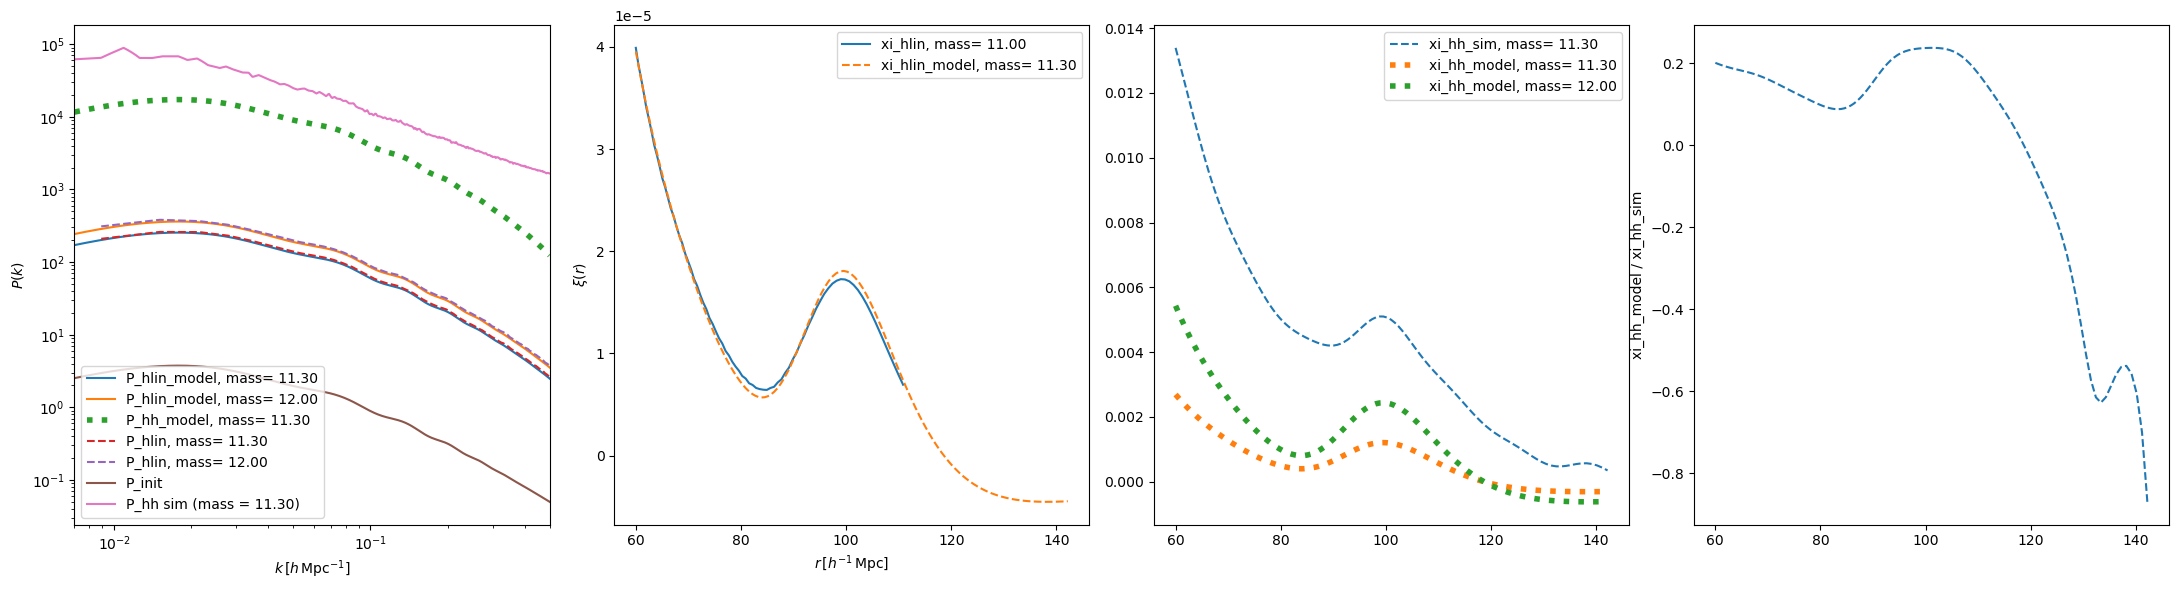

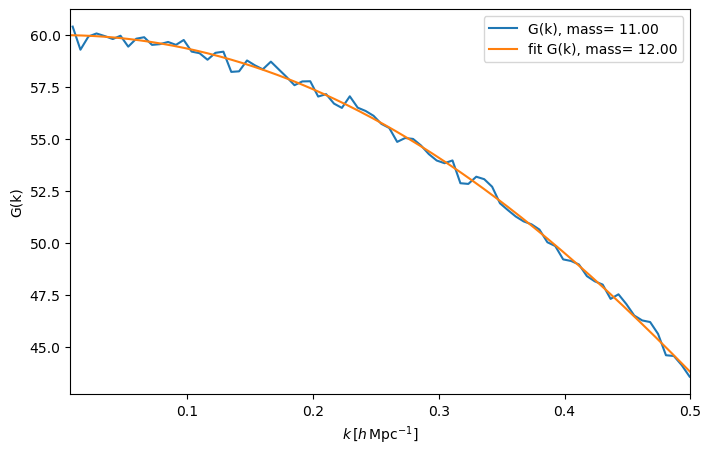

In [ ]:
plot_model(prop, fname_hh=fname_hh, sim_list=[18])

__init__: initializing parameters... 2025-07-03 17:12:03.274153
__init__: done. 2025-07-03 17:12:03.274220 

cambfile: loading defaults... 2025-07-03 17:12:03.274235
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-03 17:13:03.508232 

compressed_10p_Box1000_Part3000_0024
Simulation b'compressed_10p_Box1000_Part3000_0522' has too much fluctuation
ph_lin_model shape = (21, 600), gk shape = (21, 21, 600), p_init shape = (600,)
p_hlin_moedel : (21, 600), p_hlin.shape : (21, 79), prop.k.shape : (79,)
<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']>
cleaned k_hh_sim = [0.00628319 0.00888577 0.0108828  ... 3.13750183 3.13939366 3.14127984]
k_init = [0.007      0.00705006 0.00710048 0.00715127 0.00720241 0.00725392
 0.0073058  0.00735805 0.00741067 0.00746367 0.00751705 0.00757081
 0.00762496 0.00767949 0.00773441 0.00778973 0.00784544 0.00790155
 0.00795806 0.0080

/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/init_power.py:271: UserWarning: Class did not read input parameter(s): tol_perturb_integration
  engine  = CLASS.ClassEngine(pre_params)
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:254: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]


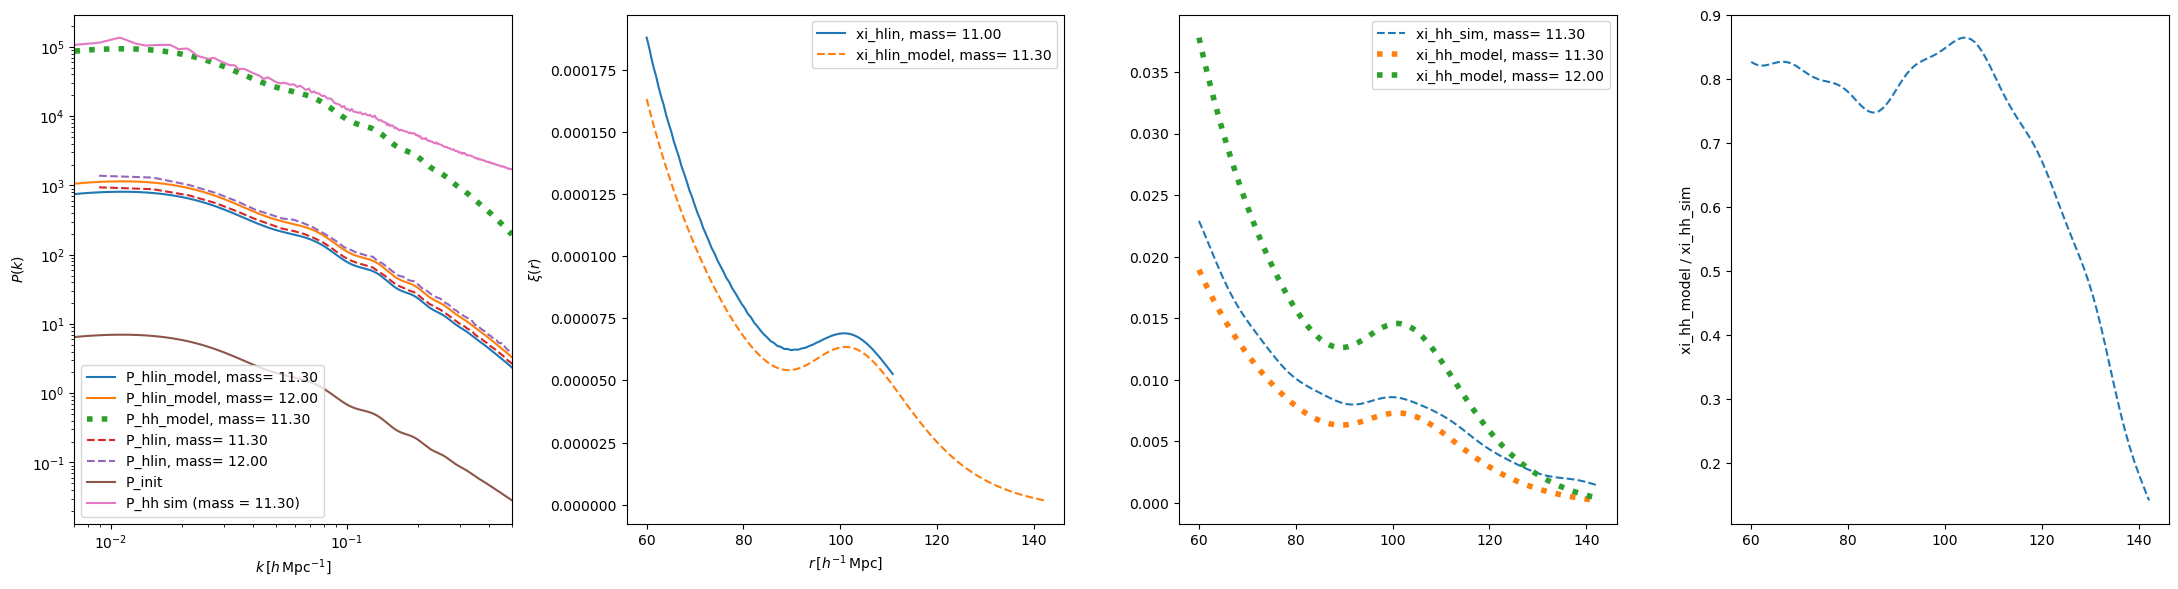

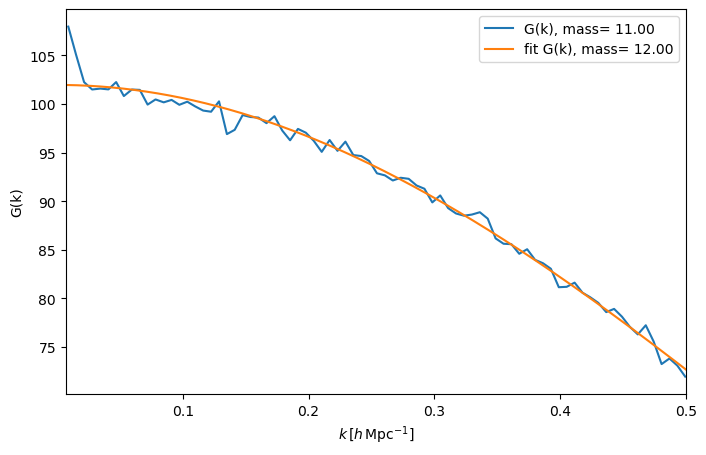

In [ ]:
fname_hh = '/home/qezlou/HD2/HETDEX/cosmo/data/power_bins/HF/power_compressed_10p_Box1000_Part3000_0024.hdf5'
plot_model(prop, sim_list=[15])

<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']>
cleaned k_hh_sim = [0.00628319 0.00888577 0.0108828  ... 3.13750183 3.13939366 3.14127984]
k_init = [0.007      0.00705006 0.00710048 0.00715127 0.00720241 0.00725392
 0.0073058  0.00735805 0.00741067 0.00746367 0.00751705 0.00757081
 0.00762496 0.00767949 0.00773441 0.00778973 0.00784544 0.00790155
 0.00795806 0.00801497 0.00807229 0.00813003 0.00818817 0.00824673
 0.00830571 0.00836511 0.00842494 0.00848519 0.00854587 0.00860699
 0.00866855 0.00873054 0.00879298 0.00885587 0.00891921 0.00898299
 0.00904724 0.00911194 0.00917711 0.00924274 0.00930885 0.00937542
 0.00944247 0.00951    0.00957802 0.00964652 0.00971551 0.00978499
 0.00985497 0.00992545 0.00999644 0.01006793 0.01013994 0.01021245
 0.01028549 0.01035905 0.01043314 0.01050775 0.0105829  0.01065859
 0.01073482 0.01081159 0.01088892 0.01096679 0.01104522 0.01112422
 0.01120378 0.0112839  0.0113646  0.01144588 0.01152774 0.01161018
 0.01169322 0.01177685 0.01186107 0.0

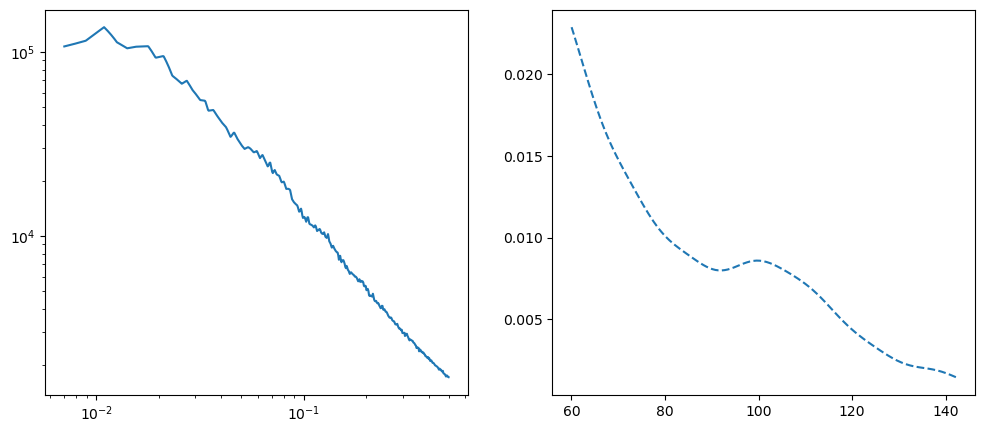

In [63]:
# Plot the P_hh directly from simulation
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
with h5py.File(f'/home/qezlou/HD2/HETDEX/cosmo/data/power_bins/HF/power_compressed_10p_Box1000_Part3000_0024.hdf5', 'r') as f:
    print(f.keys())
    k_hh_sim = f['k'][:]
    p_hh_sim = f['power'][:]
    mpairs = f['pairs'][:]
    
    ind_k = np.where(~np.isnan(p_hh_sim).any(axis=0) & (k_hh_sim > 0))[0]
    k_hh_sim = k_hh_sim[ind_k]
    print(f'cleaned k_hh_sim = {k_hh_sim}')
    p_hh_sim = p_hh_sim[:, ind_k]
    k_init = np.logspace(np.log10(7e-3), np.log10(0.5), num=600)
    print(f'k_init = {k_init}')
    p_hh_sim = interp1d(k_hh_sim, p_hh_sim, axis=-1, bounds_error=False, fill_value="extrapolate")(k_init)

    ind_m = np.where(( mpairs[:,0] == 11.3) & (mpairs[:,1] == 11.3))[0]
    ax[0].plot(k_init, p_hh_sim[ind_m,:].squeeze(), label=f'P_hh sim (mass = {mpairs[ind_m,0][0]:.2f})')

    r_hh_sim, xi_hh_sim = mcfit.P2xi(k_init, l=0, lowring=True)(np.copy(p_hh_sim[ind_m,:].squeeze()), extrap=True)
    ind_r = np.where((r_hh_sim >= 60) & (r_hh_sim <= 200))[0]
    ax[1].plot(r_hh_sim[ind_r], xi_hh_sim[ind_r], label=f'xi_hh_sim, mass= {mpairs[ind_m,0][0]:.2f}', ls='--')

ax[0].set_xscale('log')
ax[0].set_yscale('log')


In [40]:
k_hh_sim, k_init

(array([0.        , 0.00628319, 0.00888577, ..., 3.13750183, 3.13939366,
        3.14127984]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, n

### For L2:

In [71]:
import importlib
from gal_goku import summary_stats
importlib.reload(summary_stats)

data_dir='/home/qezlou/HD2/HETDEX/cosmo/data'
prop = summary_stats.Propagator(data_dir=data_dir, z=2.5, fid='L2')
#prop.gk.shape

summary_stats | 07/03/2025 05:23:08 PM | Rank 0 | INFO  |  Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2
summary_stats | 07/03/2025 05:23:08 PM | Rank 0 | INFO  |  Found 151 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2
Simulation b'compressed_10p_Box250_Part750_0295' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0051' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0060' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0270' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0081' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0070' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0021' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0018' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0033' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0285' has too much fluctuation
Simula

/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:254: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:322: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(func, self.k, self.gk[i,m])


In [75]:
for i, sm in enumerate(prop.sim_tags):
    if sm == 'compressed_10p_Box250_Part750_0000':
        print(i, sm)

118 compressed_10p_Box250_Part750_0000


__init__: initializing parameters... 2025-07-03 17:27:15.377576
__init__: done. 2025-07-03 17:27:15.377707 

cambfile: loading defaults... 2025-07-03 17:27:15.377728
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-03 17:28:15.490891 

compressed_10p_Box250_Part750_0000
Simulation b'compressed_10p_Box250_Part750_0295' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0051' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0060' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0270' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0081' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0070' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0021' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0018' has too much fluctuation
Simulation b'comp

/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/init_power.py:271: UserWarning: Class did not read input parameter(s): tol_perturb_integration
  engine  = CLASS.ClassEngine(pre_params)
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:254: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]


IndexError: index 0 is out of bounds for axis 0 with size 0

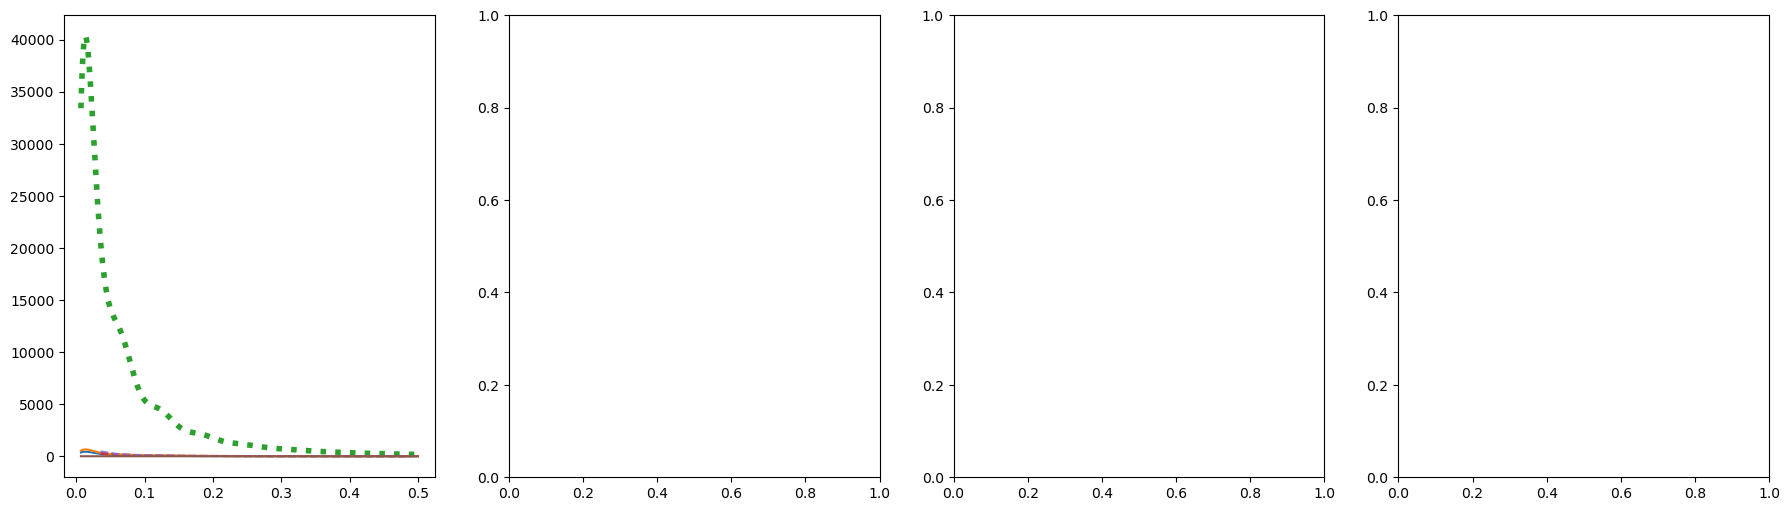

In [77]:
fname_hh = '/home/qezlou/HD2/HETDEX/cosmo/data/power_bins/L2/power_compressed_10p_Box250_Part750_0000.hdf5'
plot_model(prop, sim_list=[118], fname_hh=fname_hh)

<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']> [13.  12.5 12.  11.5 11. ]
cleaned k_hh_sim = [ 0.02513274  0.03554306  0.04353118 ... 12.55000731 12.55757465
 12.56511937]
k_init = [0.007      0.00705006 0.00710048 0.00715127 0.00720241 0.00725392
 0.0073058  0.00735805 0.00741067 0.00746367 0.00751705 0.00757081
 0.00762496 0.00767949 0.00773441 0.00778973 0.00784544 0.00790155
 0.00795806 0.00801497 0.00807229 0.00813003 0.00818817 0.00824673
 0.00830571 0.00836511 0.00842494 0.00848519 0.00854587 0.00860699
 0.00866855 0.00873054 0.00879298 0.00885587 0.00891921 0.00898299
 0.00904724 0.00911194 0.00917711 0.00924274 0.00930885 0.00937542
 0.00944247 0.00951    0.00957802 0.00964652 0.00971551 0.00978499
 0.00985497 0.00992545 0.00999644 0.01006793 0.01013994 0.01021245
 0.01028549 0.01035905 0.01043314 0.01050775 0.0105829  0.01065859
 0.01073482 0.01081159 0.01088892 0.01096679 0.01104522 0.01112422
 0.01120378 0.0112839  0.0113646  0.01144588 0.01152774 0.01161018
 0.

IndexError: index 0 is out of bounds for axis 0 with size 0

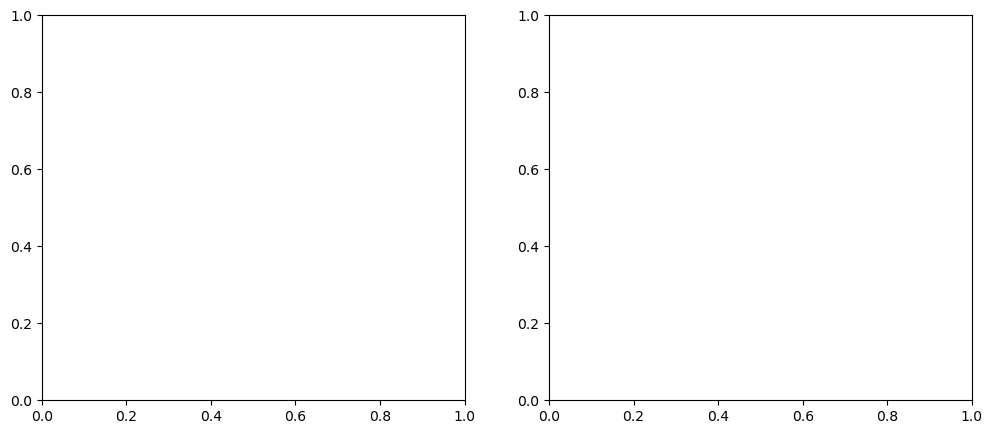

In [79]:
# Plot the P_hh directly from simulation
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
with h5py.File(f'/home/qezlou/HD2/HETDEX/cosmo/data/power_bins/L2/power_compressed_10p_Box250_Part750_0000.hdf5', 'r') as f:
    print(f.keys(), f['mbins'][:])
    k_hh_sim = f['k'][:]
    p_hh_sim = f['power'][:]
    mpairs = f['pairs'][:]
    
    ind_k = np.where(~np.isnan(p_hh_sim).any(axis=0) & (k_hh_sim > 0))[0]
    k_hh_sim = k_hh_sim[ind_k]
    print(f'cleaned k_hh_sim = {k_hh_sim}')
    p_hh_sim = p_hh_sim[:, ind_k]
    k_init = np.logspace(np.log10(7e-3), np.log10(0.5), num=600)
    print(f'k_init = {k_init}')
    p_hh_sim = interp1d(k_hh_sim, p_hh_sim, axis=-1, bounds_error=False, fill_value="extrapolate")(k_init)

    ind_m = np.where(( mpairs[:,0] == 11.3) & (mpairs[:,1] == 11.3))[0]
    ax[0].plot(k_init, p_hh_sim[ind_m,:].squeeze(), label=f'P_hh sim (mass = {mpairs[ind_m,0][0]:.2f})')

    r_hh_sim, xi_hh_sim = mcfit.P2xi(k_init, l=0, lowring=True)(np.copy(p_hh_sim[ind_m,:].squeeze()), extrap=True)
    ind_r = np.where((r_hh_sim >= 60) & (r_hh_sim <= 200))[0]
    ax[1].plot(r_hh_sim[ind_r], xi_hh_sim[ind_r], label=f'xi_hh_sim, mass= {mpairs[ind_m,0][0]:.2f}', ls='--')

ax[0].set_xscale('log')
ax[0].set_yscale('log')


__init__: initializing parameters... 2025-07-03 12:28:32.374331
__init__: done. 2025-07-03 12:28:32.374476 

cambfile: loading defaults... 2025-07-03 12:28:32.374490
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-03 12:29:45.207383 

compressed_10p_Box250_Part750_0295
Simulation b'compressed_10p_Box250_Part750_0295' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0051' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0060' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0270' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0081' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0070' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0021' has too much fluctuation
Simulation b'compressed_10p_Box250_Part750_0018' has too much fluctuation
Simulation b'comp

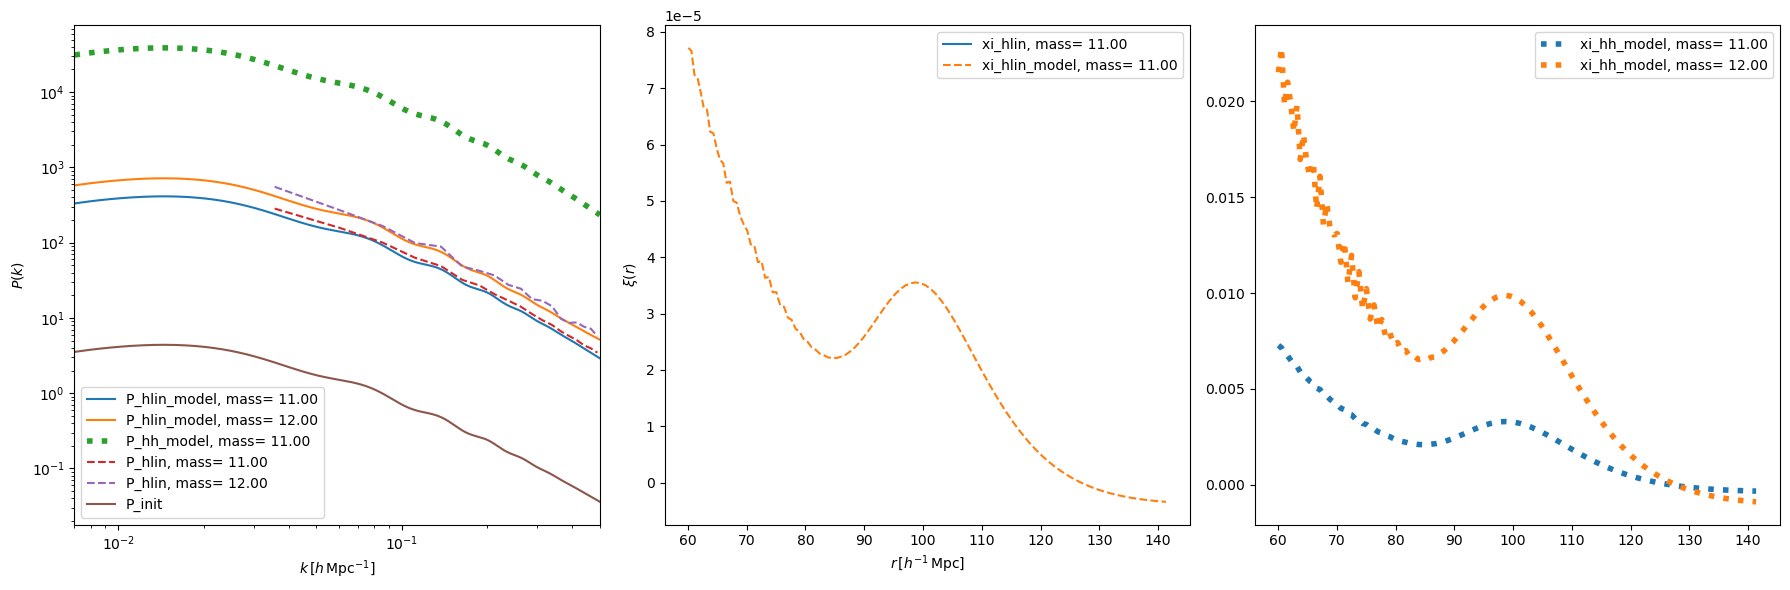

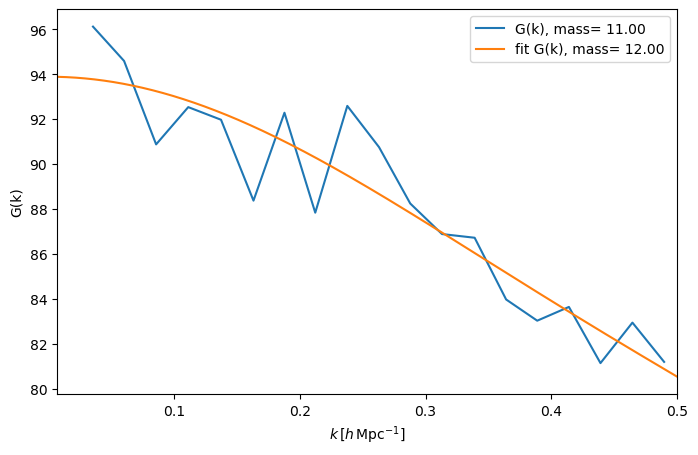

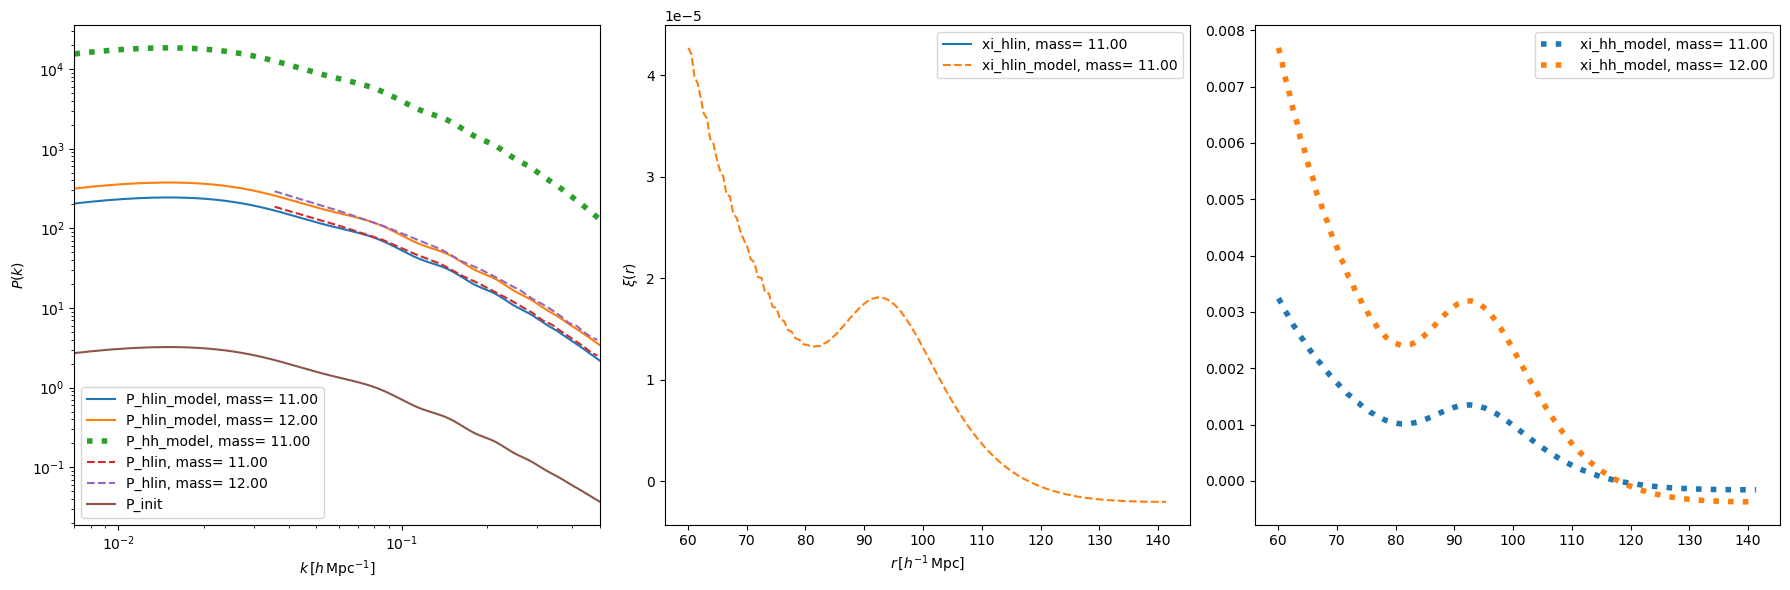

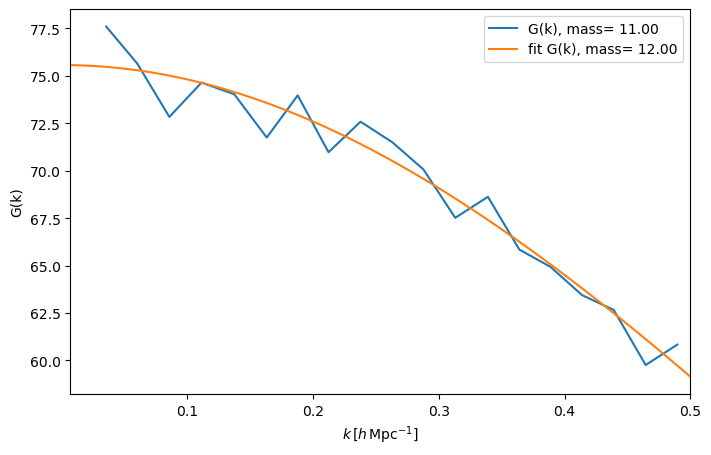

In [35]:
plot_model(prop, sim_list=[0, 100])

## $P_{lin, init}$ for arbitrary cosmo:

### Computing time challenge:

In [2]:
import importlib
from gal_goku import summary_stats
importlib.reload(summary_stats)

data_dir='/home/qezlou/HD2/HETDEX/cosmo/data'
prop = summary_stats.Propagator(data_dir=data_dir, z=2.5, fid='HF')

summary_stats | 07/02/2025 11:09:52 PM | Rank 0 | INFO  |  Found 21 files in /home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF
Simulation b'compressed_10p_Box1000_Part3000_0522' has too much fluctuation


/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:254: RuntimeWarning: invalid value encountered in divide
  ratio = f['power_hlin'][:,:] / f['power_init'][:]


In [2]:
prop.params[10]

array([ 3.05560000e-01,  5.47300000e-02,  7.07626667e-01,  2.20666667e-09,
        8.54200000e-01, -2.30500000e-01, -2.58333333e-01,  3.43740000e+00,
        1.04666667e-02,  5.99600000e-01])

In [3]:
import importlib
from gal_goku import gal
importlib.reload(gal)

gal_base = gal.GalBase()
box= 1_000
npart=3_000
cosmo_pars = prop.params[10]
nu_acc=1e-1
k_orig_nu_acc, pk_orig_nu_acc = gal_base.get_init_linear_power(box=box, npart=npart, cosmo_pars=cosmo_pars, nu_acc=nu_acc , k=None)

__init__: initializing parameters... 2025-07-02 12:49:26.453057
__init__: done. 2025-07-02 12:49:26.453127 

cambfile: loading defaults... 2025-07-02 12:49:26.453142
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-02 12:53:38.518566 



/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/init_power.py:279: UserWarning: Class did not read input parameter(s): tol_perturb_integration
  engine  = CLASS.ClassEngine(pre_params)


In [19]:
import importlib
from gal_goku import gal
importlib.reload(gal)

gal_base = gal.GalBase()
box= 1_000
npart=3_000
cosmo_pars = prop.params[10]
k_nu0, pk_nu_0 = gal_base.get_init_linear_power(box=box, npart=npart, cosmo_pars=cosmo_pars, nu_acc=1e-1, k=None)

__init__: initializing parameters... 2025-07-02 12:15:03.879621
__init__: done. 2025-07-02 12:15:03.879671 

cambfile: loading defaults... 2025-07-02 12:15:03.879685
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-02 12:15:16.337414 



/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/init_power.py:279: UserWarning: Class did not read input parameter(s): tol_perturb_integration
  engine  = CLASS.ClassEngine(pre_params)


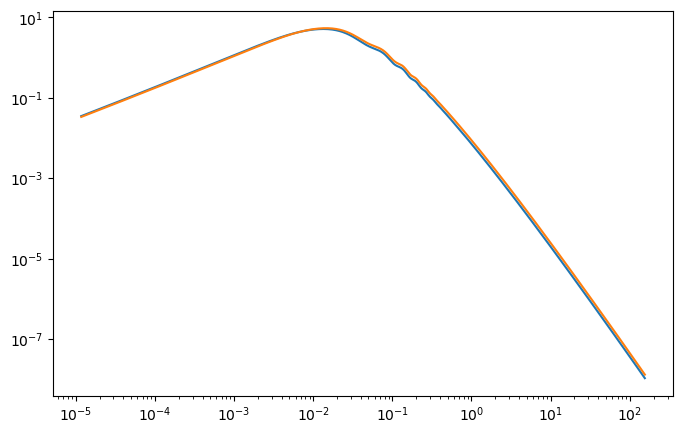

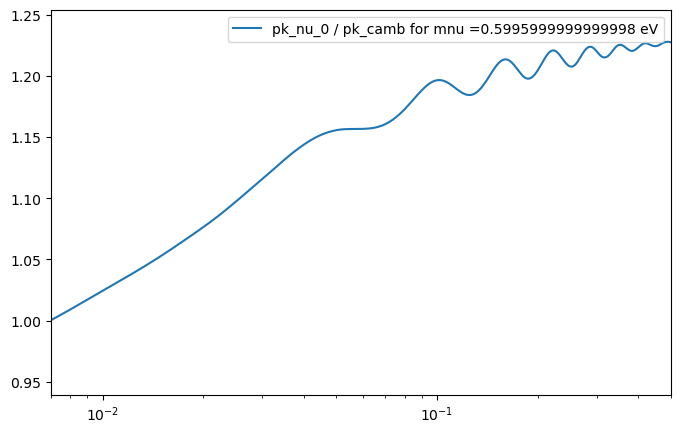

In [25]:
from scipy.interpolate import interp1d
import numpy as np

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(k.squeeze(), pk.squeeze(), label='P_lin from CAMB')
ax.plot(k_nu0.squeeze(), pk_nu_0.squeeze(), label='P_lin from gal_goku')
ax.set_xscale('log')
ax.set_yscale('log')

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
interp_log_pk_nu0 = interp1d(k_nu0.squeeze(), np.log10(pk_nu_0.squeeze()), bounds_error=False, fill_value="extrapolate")
ax.plot(k.squeeze(), 10**interp_log_pk_nu0(k.squeeze()) / pk.squeeze(), label=f'pk_nu_0 / pk_camb for mnu ={cosmo_pars[9]} eV')
ax.legend()
#ax.plot(k.squeeze(), pk.squeeze() / pk_nu_0.squeeze(), label='P_lin from CAMB / P_lin from gal_goku')
ax.set_xlim(7e-3, 0.5)
ax.set_xscale('log')

Assuming $m_{\nu} =0$, would be bad even for $k < 0.5$.

Let's increase the tollerence for neutrino calcls`nu_acc`

In [4]:
import importlib
from gal_goku import gal
importlib.reload(gal)

gal_base = gal.GalBase()
box= 1_000
npart=3_000
cosmo_pars = prop.params[10]
nu_acc=1
k, pk = gal_base.get_init_linear_power(box=box, npart=npart, cosmo_pars=cosmo_pars, nu_acc=nu_acc, k=None)

/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/init_power.py:279: UserWarning: Class did not read input parameter(s): tol_perturb_integration
  engine  = CLASS.ClassEngine(pre_params)


__init__: initializing parameters... 2025-07-02 12:53:38.553716
__init__: done. 2025-07-02 12:53:38.553771 

cambfile: loading defaults... 2025-07-02 12:53:38.553786
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-02 12:56:23.317577 



In [17]:
import importlib
from gal_goku import gal
importlib.reload(gal)

gal_base = gal.GalBase()
box= 1_000
npart=3_000
cosmo_pars = prop.params[10]
nu_acc=1e-3
k_001, pk_nu001 = gal_base.get_init_linear_power(box=box, npart=npart, cosmo_pars=cosmo_pars, nu_acc=nu_acc, k=None)
k_001 = k_001.squeeze()
pk_nu001 = pk_nu001.squeeze()
ind = np.where(k_001 <= 0.5)[0]
k_001 = k_001[ind]
pk_nu001 = pk_nu001[ind]

__init__: initializing parameters... 2025-07-02 23:15:46.397936
__init__: done. 2025-07-02 23:15:46.398001 

cambfile: loading defaults... 2025-07-02 23:15:46.398015
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-02 23:15:59.730062 



/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/init_power.py:280: UserWarning: Class did not read input parameter(s): tol_perturb_integration
  engine  = CLASS.ClassEngine(pre_params)


In [25]:
import importlib
from gal_goku import gal
importlib.reload(gal)

gal_base = gal.GalBase()
box= 1_000
npart=3_000
cosmo_pars = prop.params[10]
nu_acc=1e-5
k_00001, pk_nu00001 = gal_base.get_init_linear_power(box=box, npart=npart, cosmo_pars=cosmo_pars, nu_acc=nu_acc, k=None)

__init__: initializing parameters... 2025-07-02 13:36:17.827864
__init__: done. 2025-07-02 13:36:17.827918 

cambfile: loading defaults... 2025-07-02 13:36:17.827932
cambfile: setting up massive neutrinos...
cambfile: generating the powerspec object...
cambfile: getting the transfer functions... for z = [99] 
cambfile: done. 2025-07-02 13:56:06.728647 



/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/init_power.py:279: UserWarning: Class did not read input parameter(s): tol_perturb_integration
  engine  = CLASS.ClassEngine(pre_params)


Text(0, 0.5, '$P(k) \\ ratio$')

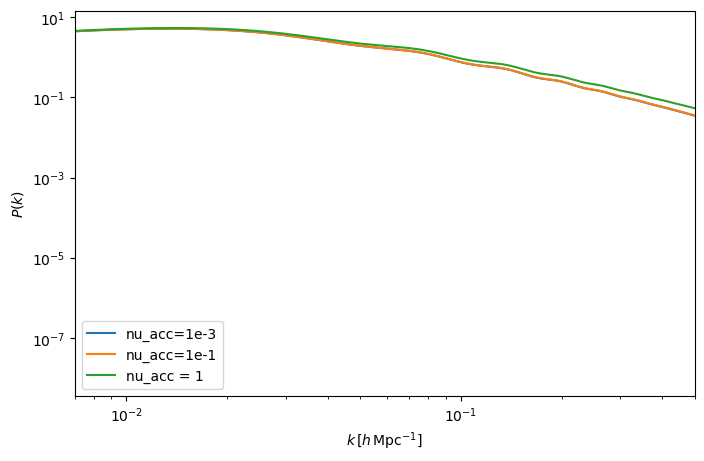

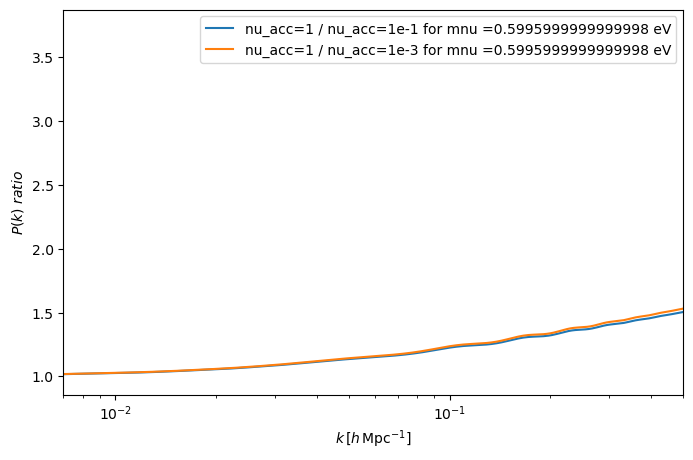

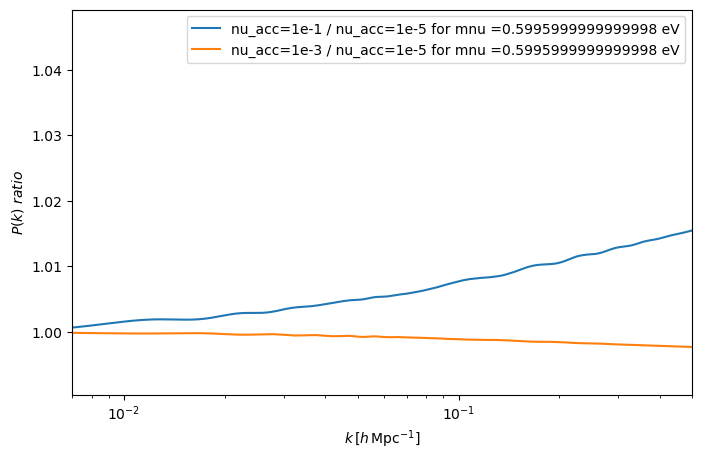

In [28]:
from scipy.interpolate import interp1d
import numpy as np

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(k_001.squeeze(), pk_nu001.squeeze(), label='nu_acc=1e-3')
ax.plot(k_orig_nu_acc.squeeze(), pk_orig_nu_acc.squeeze(), label='nu_acc=1e-1')
ax.plot(k.squeeze(), pk.squeeze(), label='nu_acc = 1')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_xlim(7e-3, 0.5)
ax.set_ylabel('$P(k)$')
ax.set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
interp_log_pk_orig_nu_acc = interp1d(k_orig_nu_acc.squeeze(), np.log10(pk_orig_nu_acc.squeeze()), bounds_error=False, fill_value="extrapolate")
ax.plot(k.squeeze(), pk.squeeze() / 10**interp_log_pk_orig_nu_acc(k.squeeze()), label=f'nu_acc=1 / nu_acc=1e-1 for mnu ={cosmo_pars[9]} eV')
ax.legend()
interp_log_pk_nu001 = interp1d(k_001.squeeze(), np.log10(pk_nu001.squeeze()), bounds_error=False, fill_value="extrapolate")
interp_log_pk_nu00001 = interp1d(k_00001.squeeze(), np.log10(pk_nu00001.squeeze()), bounds_error=False, fill_value="extrapolate")
ax.plot(k.squeeze(), pk.squeeze() / 10**interp_log_pk_nu001(k.squeeze()), label=f'nu_acc=1 / nu_acc=1e-3 for mnu ={cosmo_pars[9]} eV')
ax.legend()
ax.set_xlim(7e-3, 0.5)
ax.set_xscale('log')
ax.set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
ax.set_ylabel('$P(k) \ ratio$')

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(k.squeeze(), 10**interp_log_pk_orig_nu_acc(k.squeeze()) / 10**interp_log_pk_nu00001(k.squeeze()), label=f'nu_acc=1e-1 / nu_acc=1e-5 for mnu ={cosmo_pars[9]} eV')
ax.plot(k.squeeze(), 10**interp_log_pk_nu001(k.squeeze()) / 10**interp_log_pk_nu00001(k.squeeze()), label=f'nu_acc=1e-3 / nu_acc=1e-5 for mnu ={cosmo_pars[9]} eV')
ax.legend()
ax.set_xlim(7e-3, 0.5)
ax.set_xscale('log')
ax.set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
ax.set_ylabel('$P(k) \ ratio$')

`nu_acc` should be 1e-3 which takes about 8 min on my PC. Better precision (1e-5) changes the P(k) with less than 1%, but requires 20 minutes on my PC. However, with `nu_acc=1e-1`, we can get 2% accuracy, but as fast as 4 minutes.

None of these are fast enough to run on the spot, so I have to build another emulator for the linear power at z=99 if I want to use the propagator idea.

### Comapre my classylss run (`nu_acc=1e-3`) with goku init power:

In [19]:
import numpy as np
def get_init_power(sim=241):
    # already computed with mp-gadget
    if sim == 10:
        savefile='/home/qezlou/HD2/HETDEX/cosmo/pack_dev/test/gadget_pow/ics_matterpow_99_sim0241.dat'
    elif sim== 15:
        savefile='/home/qezlou/HD2/HETDEX/cosmo/pack_dev/test/gadget_pow/ics_matterpow_99_sim0024.dat'
    with open(savefile,'r') as f:
        data = np.loadtxt(f)
        k = data[:, 0]
        p_init = data[:, 1]
    ind = np.where(k <=0.5)[0]
    k = k[ind]
    p_init = p_init[ind]
    return k, p_init

k_goku, p_init_goku = get_init_power(sim=10)

Text(0, 0.5, '$P(k) \\ ratio$')

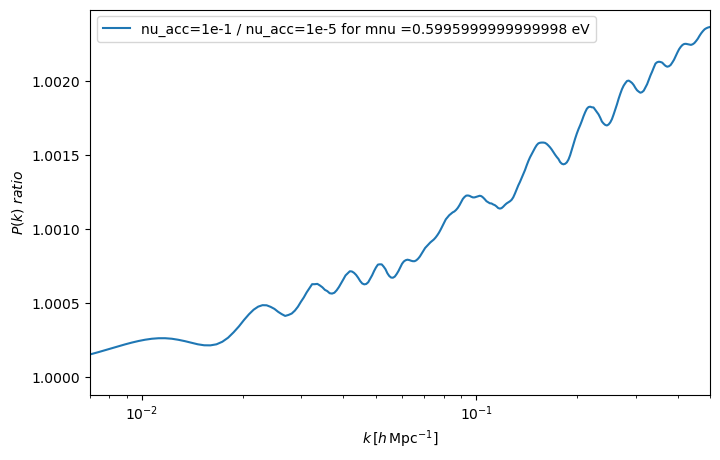

In [22]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
interp_p_init_goku = interp1d(k_goku.squeeze(), np.log10(p_init_goku.squeeze()), bounds_error=False, fill_value="extrapolate")
ax.plot(k_goku.squeeze(), 10**interp_p_init_goku(k_001).squeeze() / pk_nu001.squeeze(), label=f'nu_acc=1e-1 / nu_acc=1e-5 for mnu ={cosmo_pars[9]} eV')

ax.legend()
ax.set_xlim(7e-3, 0.5)
ax.set_xscale('log')
ax.set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
ax.set_ylabel('$P(k) \ ratio$')